https://networks.skewed.de/net/highschool#None_draw

### Preliminary activities

#### Import Libraries 

In [1]:
#import libraries
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import community as community_louvain
from collections import defaultdict
import matplotlib.patches as mpatches
import matplotlib.cm as cm  # Import the colormap module
import random
from tabulate import tabulate
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.gridspec import GridSpec
import scipy.stats as sp


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
save_path = "/Users/marwan/Desktop/SNA_Project/moreno_highschool/Images/"

#### Import data and pre-processing

In [2]:
file_path = "/Users/marwan/Desktop/SNA_Project/moreno_highschool/out.moreno_highschool_highschool.tsv"

# Read the tsv file and create a dataframe by skipping the first row
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['from_node', 'to_node', 'weight'], on_bad_lines='skip')
df= data.iloc[1::]

In [3]:
# Convert the types of the cells into int64 ones
df[['from_node', 'to_node', 'weight']] = df[['from_node', 'to_node', 'weight']].apply(pd.to_numeric)

/var/folders/j2/rc9b31n10c785nfmkc7v_10w0000gn/T/ipykernel_5292/3618548157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['from_node', 'to_node', 'weight']] = df[['from_node', 'to_node', 'weight']].apply(pd.to_numeric)


### Graph Construction

In [4]:
# Create a directed graph
G = nx.DiGraph()

In [5]:
# Add nodes to the graph
G.add_nodes_from(df['from_node'])
G.add_nodes_from(df['to_node'])

In [6]:
# Add weighted edges to the graph
for index, row in df.iterrows():
    G.add_edge(row['from_node'], row['to_node'], weight=row['weight'])

### EDA

In [7]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()
density = nx.density(G)

print("The number of nodes in the graph is: ", nodes)
print("The number of edges in the graph is: ", edges)
print(f"Network Density: {density:.4f}")

The number of nodes in the graph is:  70
The number of edges in the graph is:  366
Network Density: 0.0758


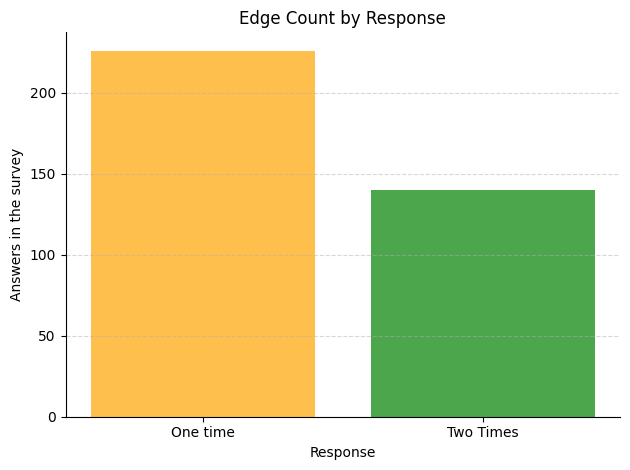

In [8]:
# Extract and count the weights from the edge data
weight_counts = nx.get_edge_attributes(G, 'weight')
weight_1_count = sum(1 for weight in weight_counts.values() if weight == 1)
weight_2_count = sum(1 for weight in weight_counts.values() if weight == 2)

# Create bar plot with a minimalistic look
weights = ['One time', 'Two Times']
counts = [weight_1_count, weight_2_count]

plt.bar(weights, counts, color=['orange', 'green'], alpha=0.7)  # Reduced opacity
plt.xlabel('Response')
plt.ylabel('Answers in the survey')
plt.title('Edge Count by Response')
plt.xticks(weights)
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines with reduced opacity
plt.tight_layout()  # Ensure labels fit within the figure
plt.savefig(save_path + "node_count_by_weight.svg", bbox_inches='tight', dpi = 1000)
plt.show()

### Analysis of the Degree: degree, in_degree, out_degree

#### Degree

In [9]:
degree = list(dict(G.degree()).values())

In [10]:
print(f'Mean degree: {np.mean(degree)}')
print(f'Standard deviation: {np.std(degree)}')
print(f'Median: {np.median(degree)}')
print(f'Min: {np.min(degree)}')
print(f'Max: {np.max(degree)}')

Mean degree: 10.457142857142857
Standard deviation: 4.525122616446714
Median: 10.0
Min: 2
Max: 23


#### In_Degree

In [11]:
in_degree = list(dict(G.in_degree()).values())

In [12]:
print(f'Mean degree: {np.mean(in_degree)}')
print(f'Standard deviation: {np.std(in_degree)}')
print(f'Median: {np.median(in_degree)}')
print(f'Min: {np.min(in_degree)}')
print(f'Max: {np.max(in_degree)}')

Mean degree: 5.228571428571429
Standard deviation: 3.6141445483442594
Median: 5.0
Min: 0
Max: 18


#### Out_degree

In [13]:
out_degree = list(dict(G.out_degree()).values())

In [14]:
print(f'Mean degree: {np.mean(out_degree)}')
print(f'Standard deviation: {np.std(out_degree)}')
print(f'Median: {np.median(out_degree)}')
print(f'Min: {np.min(out_degree)}')
print(f'Max: {np.max(out_degree)}')

Mean degree: 5.228571428571429
Standard deviation: 2.0295772154489184
Median: 5.0
Min: 2
Max: 12


#### Depth Analysis and comparison between in and out-degree

In [15]:
# Compute the in-degrees and out-degrees of nodes
in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))

In [16]:
# Tabular representaion 
degrees_matrix = pd.DataFrame({'Node': list(G.nodes()), 'In-Degree': list(in_degrees.values()), 'Out-Degree': list(out_degrees.values())})
print(degrees_matrix)

    Node  In-Degree  Out-Degree
0      1          2           8
1      8          0           4
2     10          0           2
3     11          4           9
4     17          5           5
..   ...        ...         ...
65    67         13          10
66    37         13           7
67    45         10          10
68    28         23          10
69    46         21          11

[70 rows x 3 columns]


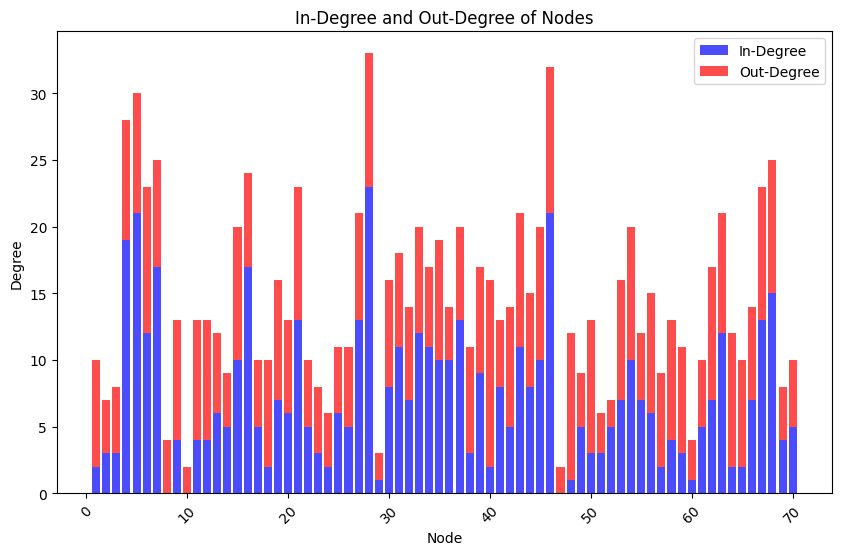

In [17]:
nodes = list(G.nodes())
in_degrees = list(in_degrees.values())
out_degrees = list(out_degrees.values())

plt.figure(figsize=(10, 6))
plt.bar(degrees_matrix['Node'], degrees_matrix['In-Degree'], label='In-Degree', color='blue', alpha=0.7)
plt.bar(degrees_matrix['Node'], degrees_matrix['Out-Degree'], label='Out-Degree', color='red', alpha=0.7, bottom=in_degrees)
plt.xlabel('Node')
plt.ylabel('Degree')
plt.title('In-Degree and Out-Degree of Nodes')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [18]:
# Calculate node in-degrees and out-degrees
node_in_degrees = dict(G.in_degree())
node_out_degrees = dict(G.out_degree())

# Sort nodes by in-degree and out-degree in descending order
sorted_in_nodes = sorted(node_in_degrees, key=lambda x: node_in_degrees[x], reverse=True)
sorted_out_nodes = sorted(node_out_degrees, key=lambda x: node_out_degrees[x], reverse=True)

# Get the top 5 central nodes by in-degree and out-degree
top_5_in_nodes = sorted_in_nodes[:5]
top_5_out_nodes = sorted_out_nodes[:5]

# Create a DataFrame to display the most central nodes
df = pd.DataFrame({
    'Node': top_5_in_nodes,
    'In-Degree': [node_in_degrees[node] for node in top_5_in_nodes],
    'Out-Degree': [node_out_degrees[node] for node in top_5_out_nodes]
})

# Display the table using tabulate for a more visually appealing format
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print("Top 5 Central Nodes by In-Degree and Out-Degree:")
print(table)

Top 5 Central Nodes by In-Degree and Out-Degree:
╒════╤════════╤═════════════╤══════════════╕
│    │   Node │   In-Degree │   Out-Degree │
╞════╪════════╪═════════════╪══════════════╡
│  0 │     28 │          18 │           12 │
├────┼────────┼─────────────┼──────────────┤
│  1 │     46 │          14 │            9 │
├────┼────────┼─────────────┼──────────────┤
│  2 │      5 │          13 │            9 │
├────┼────────┼─────────────┼──────────────┤
│  3 │      7 │          13 │            8 │
├────┼────────┼─────────────┼──────────────┤
│  4 │      4 │          12 │            8 │
╘════╧════════╧═════════════╧══════════════╛


### ECDF log-log plots

/var/folders/j2/rc9b31n10c785nfmkc7v_10w0000gn/T/ipykernel_5292/1645371241.py:10: RuntimeWarning: divide by zero encountered in log
  y_eccdf_loglog = np.log(1 - y)


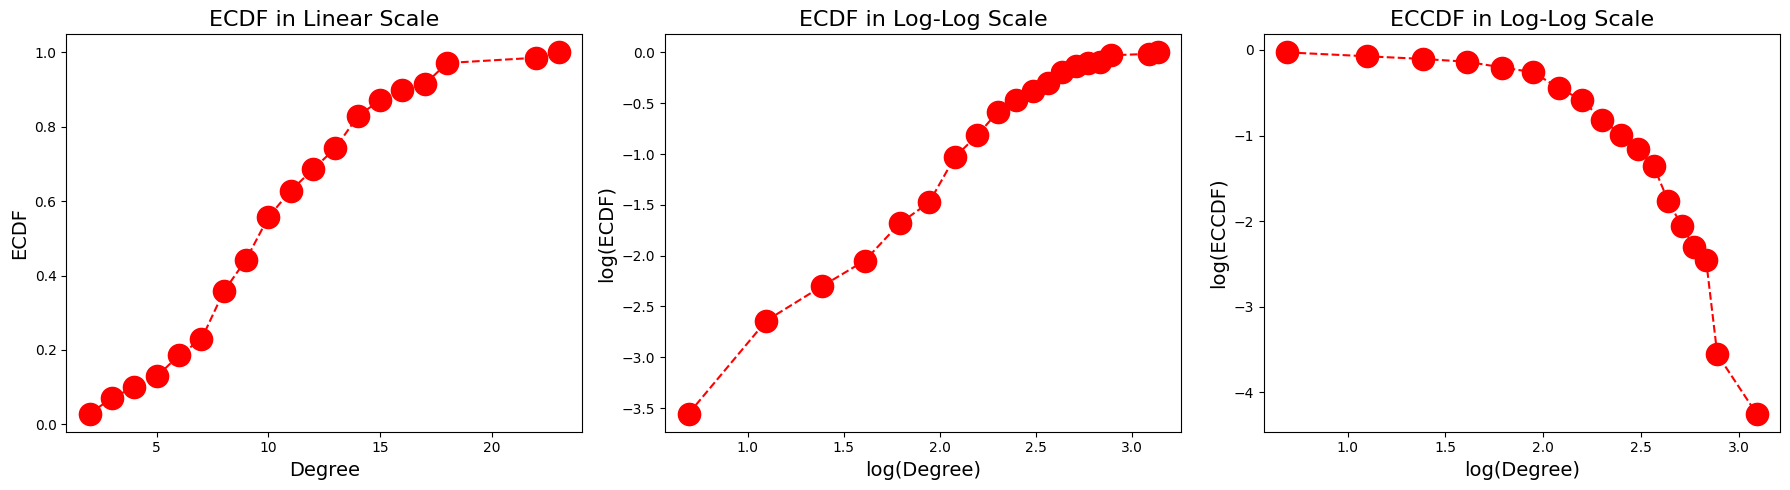

In [19]:
# ECDF in linear scale
cdf_function = ECDF(degree)
x = np.unique(degree)
y = cdf_function(x)

# ECDF in loglog scale
y_loglog = np.log(y)

# ECCDF in loglog scale
y_eccdf_loglog = np.log(1 - y)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot ECDF in linear scale
axes[0].plot(x, y, color='red', linestyle='--', marker='o', ms=16)
axes[0].set_xlabel('Degree', size=14)
axes[0].set_ylabel('ECDF', size=14)
axes[0].set_title('ECDF in Linear Scale', size=16)

# Plot ECDF in loglog scale
axes[1].plot(np.log(x), y_loglog, color='red', linestyle='--', marker='o', ms=16)
axes[1].set_xlabel('log(Degree)', size=14)
axes[1].set_ylabel('log(ECDF)', size=14)
axes[1].set_title('ECDF in Log-Log Scale', size=16)

# Plot ECCDF in loglog scale
axes[2].plot(np.log(x), y_eccdf_loglog, color='red', linestyle='--', marker='o', ms=16)
axes[2].set_xlabel('log(Degree)', size=14)
axes[2].set_ylabel('log(ECCDF)', size=14)
axes[2].set_title('ECCDF in Log-Log Scale', size=16)

# Save the combined plot
plt.tight_layout()
plt.savefig(save_path + 'combined_plots.svg')  # Save the combined plot
plt.show()  # Display the combined plot

### Hubs & Isolated Nodes

In [20]:
percentile_95 = np.percentile(degree,95)
print(percentile_95)

18.0


In [21]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_95]
print(hub_nodi)

[4, 5, 27, 7, 28, 46]


In [22]:
print(list(nx.isolates(G)))

[]


### Random Network construction (Erdos-Renyi)

In [23]:
mean_degree = np.mean(degree)

In [24]:
p = mean_degree / (G.order()-1)

In [25]:
random_graph = nx.fast_gnp_random_graph(G.order(),p)

In [26]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 70
Number of links: 325


In [27]:
random_degree = list(dict(random_graph.degree()).values())

Text(0, 0.5, 'ECCDF')

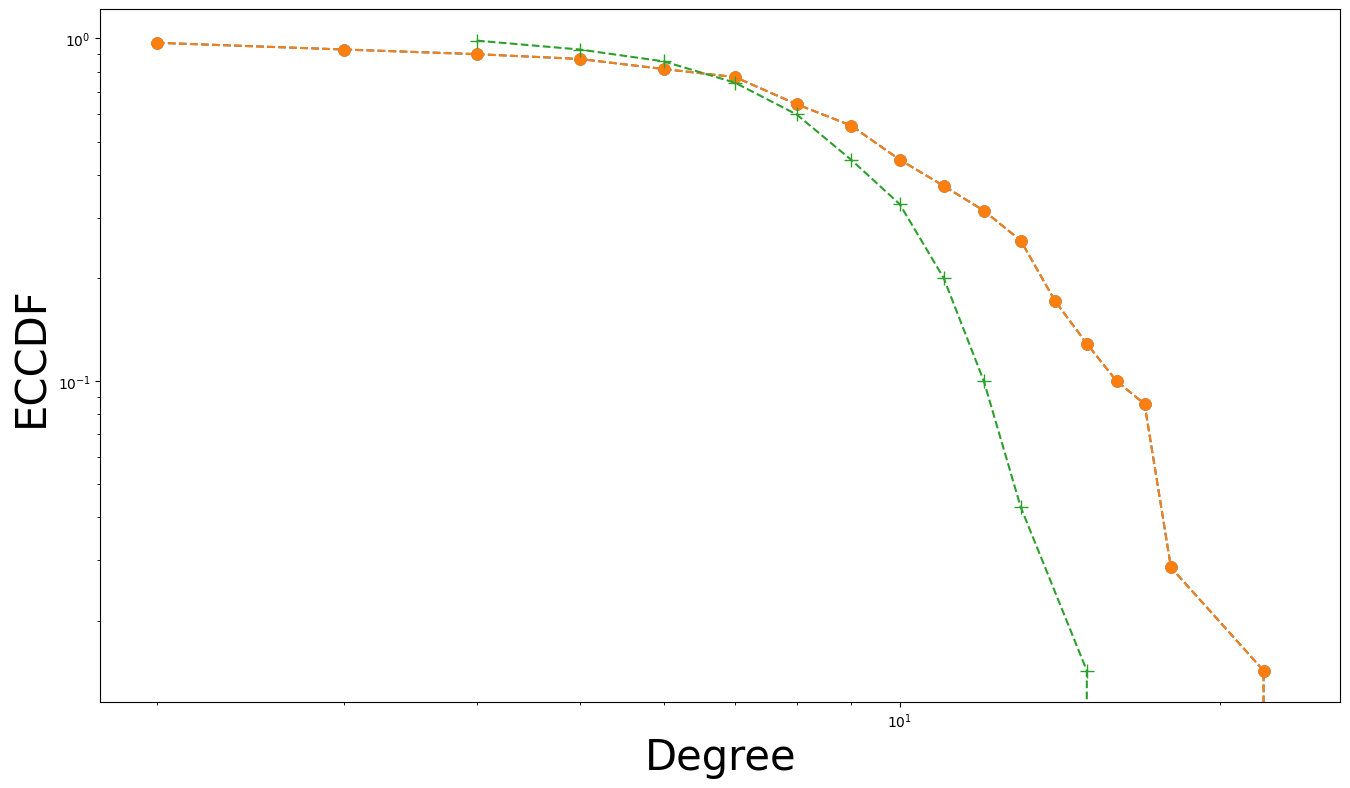

In [28]:
cdf_G = ECDF(degree)
x_G = np.unique(degree)
y_G =cdf_G(x_G)
cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)
fig_cdf_G = plt.figure(figsize=(16,9))
assi = fig_cdf_G.gca()
assi.set_xscale('log')
assi.set_yscale('log')
assi.loglog(x_G,1-y_G,marker='o',ms=8, linestyle='--')
assi.loglog(x_G,1-y_G,marker='o',ms=8, linestyle='--')
assi.plot(x_random,1-y_random,marker='+',ms=10, linestyle='--')
assi.set_xlabel('Degree',size=30)
assi.set_ylabel('ECCDF', size = 30)

In [29]:
print(f'Mean degree: {np.mean(random_degree)}')
print(f'Standard deviation: {np.std(random_degree)}')
print(f'Median: {np.median(random_degree)}')
print(f'Min: {np.min(random_degree)}')
print(f'Max: {np.max(random_degree)}')

Mean degree: 9.285714285714286
Standard deviation: 2.5698407796307268
Median: 9.0
Min: 4
Max: 16


###  Graph representation without labels

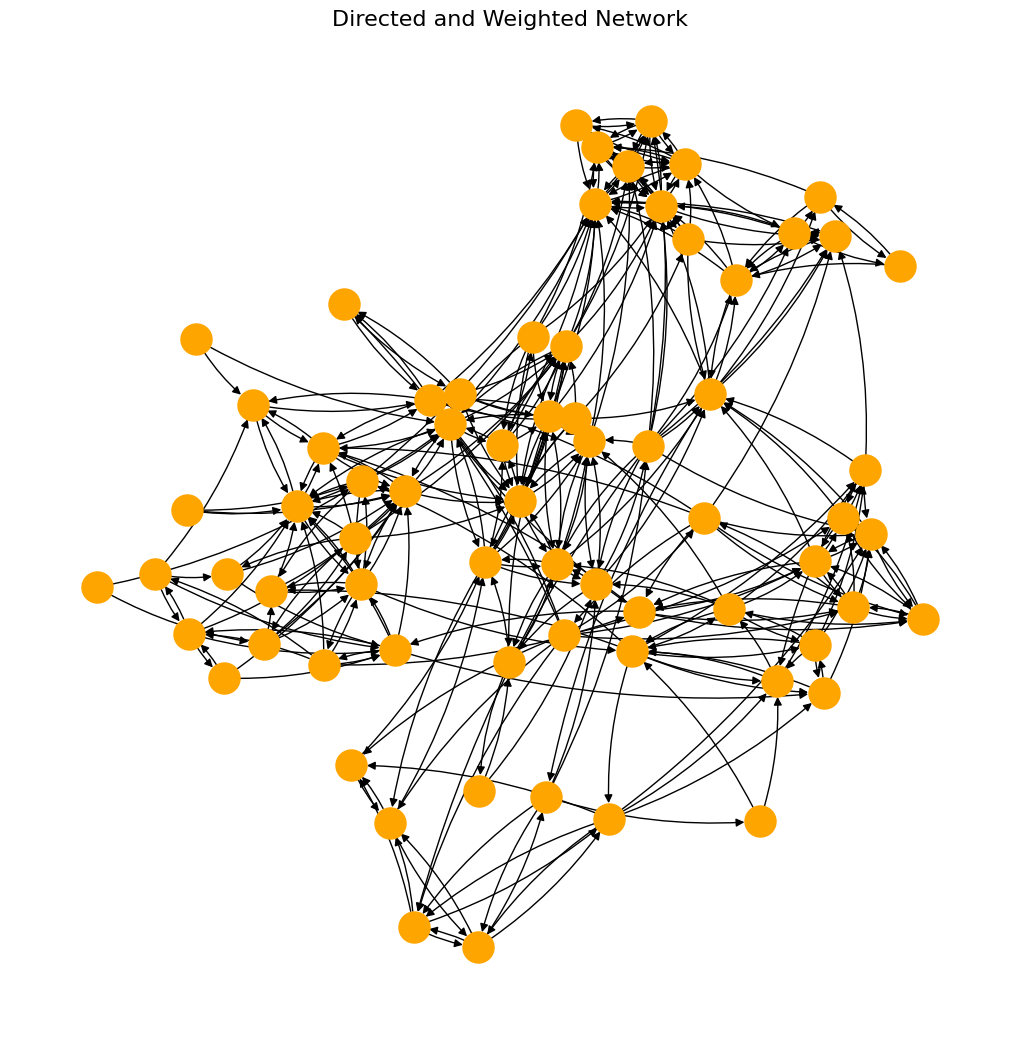

In [30]:
# Draw the graph with weighted edges
pos = nx.spring_layout(G, seed=42)  # You can choose a layout that suits your needs
labels = nx.get_edge_attributes(G, 'weight')

# Extract edge weights for labeling (optional)
edge_weights = nx.get_edge_attributes(G, "weight")

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=500, node_color="orange", font_size=12, font_color="black", arrowsize=12, 
        connectionstyle="arc3, rad=0.1")

plt.title("Directed and Weighted Network", fontsize=16)
plt.savefig(save_path + "graph.svg", bbox_inches='tight', dpi = 1000)
plt.show()

### Graph representation with labels

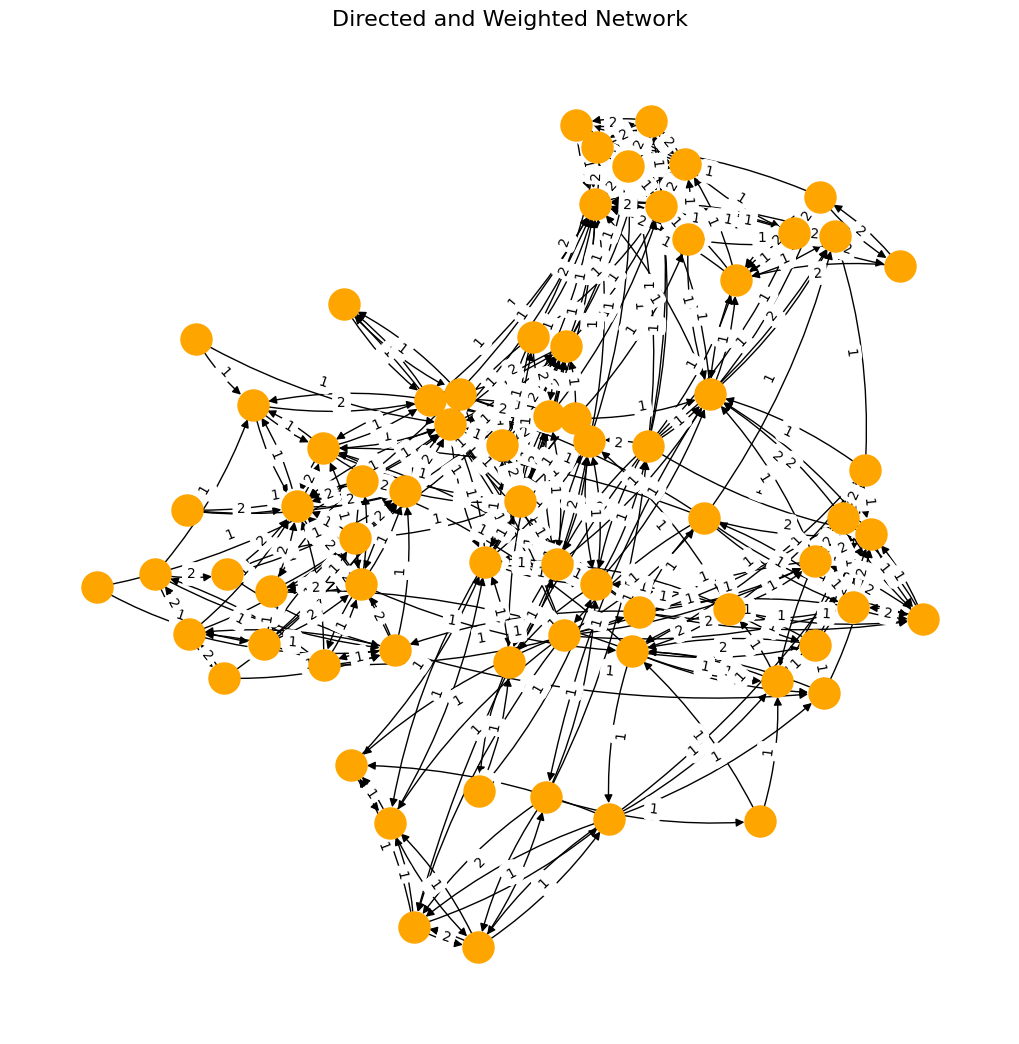

In [31]:
# Draw edge labels with weights
edge_labels = {(u, v): f"{w:.2f}" for (u, v, w) in G.edges(data="weight")}
# Draw the graph with weighted edges
pos = nx.spring_layout(G, seed=42)  # You can choose a layout that suits your needs
labels = nx.get_edge_attributes(G, 'weight')

# Extract edge weights for labeling (optional)
edge_weights = nx.get_edge_attributes(G, "weight")

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=500, node_color="orange", font_size=12, font_color="black", arrowsize=12, 
        connectionstyle="arc3, rad=0.1")

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Directed and Weighted Network", fontsize=16)
plt.savefig(save_path + "graph_edges.svg", bbox_inches='tight', dpi = 1000)
plt.show()

### Graph representation based on in-degree and centrality measure

/Users/marwan/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


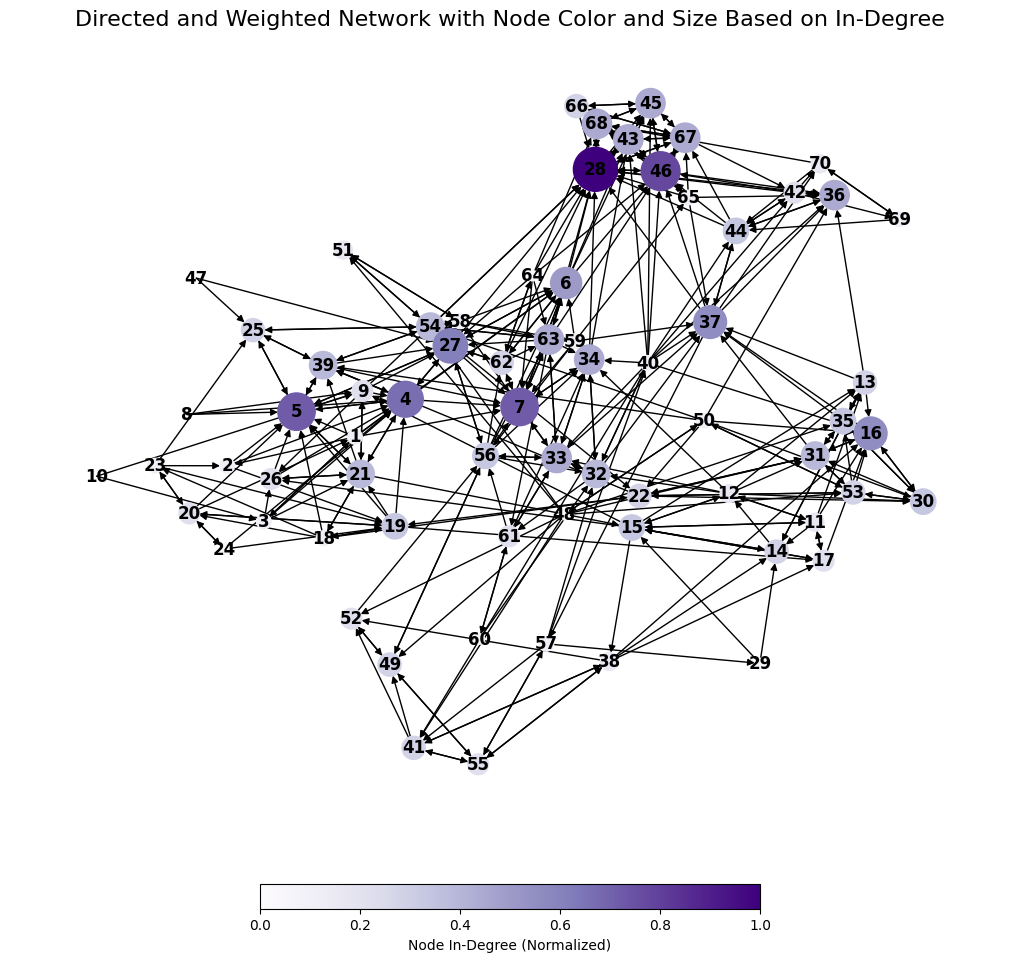

In [32]:
# Calculate node in-degrees
node_in_degrees = dict(G.in_degree())

# Normalize in-degrees to [0, 1]
max_in_degree = max(node_in_degrees.values())
normalized_in_degrees = {node: degree / max_in_degree for node, degree in node_in_degrees.items()}

# Create a list of colors based on normalized in-degrees
node_colors = [plt.cm.Purples(normalized_in_degrees[node]) for node in G.nodes()]

# Create a color map normalization instance
norm = plt.Normalize(0, 1)  # You can adjust the range as needed

# Create a ScalarMappable for color mapping
sm = plt.cm.ScalarMappable(cmap=plt.cm.Purples, norm=norm)
sm.set_array([])  # You can set an array here if needed, but it's not necessary in this case

# Calculate node sizes based on in-degrees
node_sizes = [1000 * normalized_in_degrees[node] for node in G.nodes()]  # Adjust the scaling factor (1000) as needed

# Create a directed graph visualization with node colors and sizes based on in-degree
plt.figure(figsize=(10, 10))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,  # Use the calculated node sizes
    cmap=plt.cm.Purples,
    font_size=12,
    font_color="black",
    font_weight="bold",
    arrows=True,
)

# Draw the legend for the in-degree-color mapping at the bottom
cbar = plt.colorbar(sm, label="Node In-Degree (Normalized)", orientation="horizontal", pad=0.05, shrink=0.5, ax=plt.gca())

plt.title("Directed and Weighted Network with Node Color and Size Based on In-Degree", fontsize=16)
plt.savefig(save_path + "graph_edges_in_degree.svg", bbox_inches='tight', dpi=1000)
plt.show()

### Reciprocity

In [33]:
nx.reciprocity(G)

0.5027322404371585

In [34]:
70/G.size()

0.1912568306010929

In [35]:
for u,v in G.edges():
  
    neighbors_v = set(G.neighbors(v))
    neighbors_u = set(G.neighbors(u))
    
    den = len( neighbors_v.intersection(neighbors_u) )
    
    num = len( neighbors_v.union(neighbors_u) )
    
    overlap = den/num
    
    G[u][v]['neighborhood_overlap'] = round(overlap,2) 

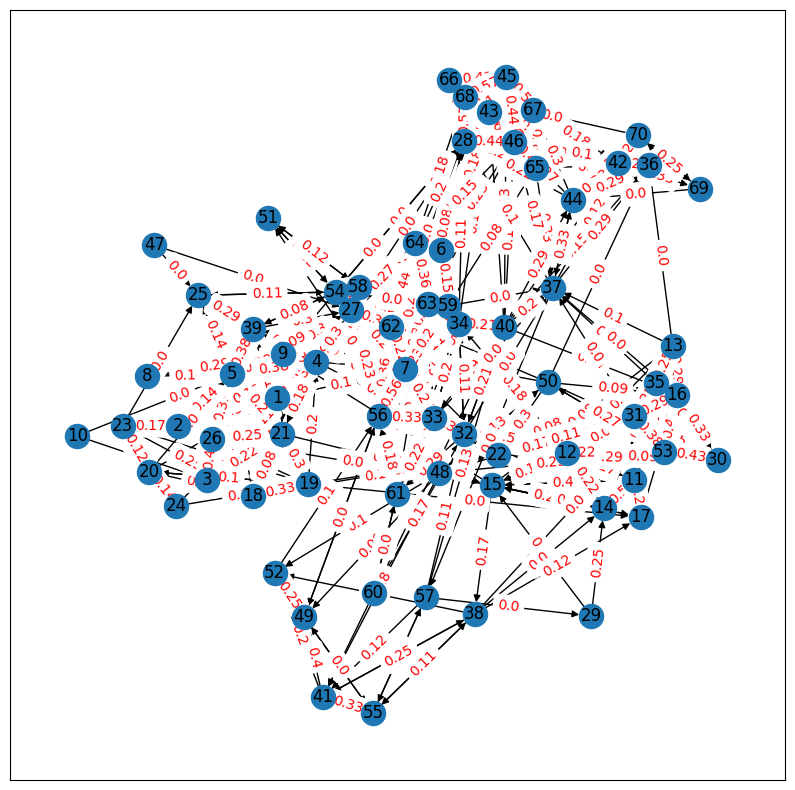

In [36]:
plt.figure(figsize = (10,10))
nx.draw_networkx(G,pos=pos)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(edge[0],edge[1]):edge[2]['neighborhood_overlap'] for edge in G.edges(data = True)},
    font_color='red'
)
plt.show()

### Transitivity

In [37]:
print('Graph - transitivity: {}'.format(nx.transitivity(G)))

Graph - transitivity: 0.40522875816993464


### Clustering coefficients

In [38]:
print('complete graph - local clustering: {}'.format(nx.clustering(G)))

complete graph - local clustering: {1: 0.2037037037037037, 8: 0.6666666666666666, 10: 0, 11: 0.4696969696969697, 17: 0.34210526315789475, 18: 0.40384615384615385, 24: 0.5, 23: 0.32142857142857145, 9: 0.29545454545454547, 29: 0.3333333333333333, 12: 0.25471698113207547, 26: 0.55, 19: 0.265625, 2: 0.35, 3: 0.25, 13: 0.26744186046511625, 20: 0.2727272727272727, 14: 0.4230769230769231, 15: 0.2471264367816092, 21: 0.32558139534883723, 4: 0.26174496644295303, 5: 0.2635135135135135, 40: 0.2111111111111111, 47: 0, 48: 0.19318181818181818, 38: 0.22058823529411764, 25: 0.32, 22: 0.29069767441860467, 49: 0.26, 57: 0.225, 50: 0.26744186046511625, 30: 0.5, 51: 0.625, 52: 0.39285714285714285, 53: 0.5, 55: 0.3333333333333333, 39: 0.32432432432432434, 54: 0.1686046511627907, 41: 0.3382352941176471, 35: 0.4215686274509804, 31: 0.3790322580645161, 16: 0.2727272727272727, 60: 0.5, 62: 0.5490196078431373, 58: 0.36764705882352944, 61: 0.46153846153846156, 56: 0.28431372549019607, 63: 0.36324786324786323, 3

In [39]:
nx.clustering(G)

{1: 0.2037037037037037,
 8: 0.6666666666666666,
 10: 0,
 11: 0.4696969696969697,
 17: 0.34210526315789475,
 18: 0.40384615384615385,
 24: 0.5,
 23: 0.32142857142857145,
 9: 0.29545454545454547,
 29: 0.3333333333333333,
 12: 0.25471698113207547,
 26: 0.55,
 19: 0.265625,
 2: 0.35,
 3: 0.25,
 13: 0.26744186046511625,
 20: 0.2727272727272727,
 14: 0.4230769230769231,
 15: 0.2471264367816092,
 21: 0.32558139534883723,
 4: 0.26174496644295303,
 5: 0.2635135135135135,
 40: 0.2111111111111111,
 47: 0,
 48: 0.19318181818181818,
 38: 0.22058823529411764,
 25: 0.32,
 22: 0.29069767441860467,
 49: 0.26,
 57: 0.225,
 50: 0.26744186046511625,
 30: 0.5,
 51: 0.625,
 52: 0.39285714285714285,
 53: 0.5,
 55: 0.3333333333333333,
 39: 0.32432432432432434,
 54: 0.1686046511627907,
 41: 0.3382352941176471,
 35: 0.4215686274509804,
 31: 0.3790322580645161,
 16: 0.2727272727272727,
 60: 0.5,
 62: 0.5490196078431373,
 58: 0.36764705882352944,
 61: 0.46153846153846156,
 56: 0.28431372549019607,
 63: 0.36324786

# Analysis


1. **Basic Network Information:**
   - Get the number of nodes and edges in the network.
   - Calculate network density (a measure of how connected the network is).
   - Check for the presence of isolated nodes (nodes with no connections).

2. **Centrality Measures:**
   - Calculate centrality measures to identify important nodes in the network. Common centrality measures include degree centrality, betweenness centrality, and closeness centrality.
   - Identify nodes with the highest centrality values as they may represent key players in the network.

3. **Community Detection:**
   - Apply community detection algorithms to identify groups or communities within the network.
   - Common algorithms include Louvain, Girvan-Newman, and modularity-based methods.
   - Visualize the communities to understand the network's structure.

4. **Path Analysis:**
   - Find the shortest paths between nodes using algorithms like Dijkstra's or Floyd-Warshall.
   - Identify key paths or routes within the network.

5. **Clustering Coefficients:**
   - Calculate clustering coefficients to understand how nodes tend to cluster together.
   - High clustering coefficients indicate the presence of clusters or cliques.

6. **Network Visualization:**
   - Visualize the network with different layouts to gain insights into its structure.
   - Use node colors, sizes, and edge thickness to represent attributes or weights.

7. **Centrality Visualization:**
   - Visualize centrality measures on the network (e.g., node size proportional to degree centrality).
   - Identify hubs and important nodes easily.

8. **Statistical Analysis:**
   - Conduct statistical tests to assess network properties, such as assortativity (tendency for nodes to connect to similar nodes) and correlation between attributes and network structure.

# 2 Centrality Measures

In [40]:
# Degree Centrality: Measures the number of edges connected to each node
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality: Measures how often a node lies on the shortest path between other nodes
betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True, endpoints=False)

# Closeness Centrality: Measures how close a node is to all other nodes in terms of shortest paths
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector centrality: 
eigenvector_centrality = nx.eigenvector_centrality(G)

In [41]:
# Sort and print Degree Centrality in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Degree Centrality (sorted):")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"Node {node}: {centrality:.4f}")

# Sort and print Betweenness Centrality in descending order
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nBetweenness Centrality (sorted):")
for node, centrality in sorted_betweenness_centrality[:10]:
    print(f"Node {node}: {centrality:.4f}")

# Sort and print Closeness Centrality in descending order
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nCloseness Centrality (sorted):")
for node, centrality in sorted_closeness_centrality[:10]:
    print(f"Node {node}: {centrality:.4f}")

# Sort and print Eigenvector Centrality in descending order
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nEigenvector Centrality (sorted):")
for node, eigenvector in sorted_eigenvector_centrality[:10]:
    print(f"Node {node}: {centrality:.4f}")

Degree Centrality (sorted):
Node 28: 0.3333
Node 46: 0.3188
Node 4: 0.2609
Node 5: 0.2609
Node 27: 0.2609
Node 7: 0.2609
Node 6: 0.2464
Node 63: 0.2319
Node 37: 0.2319
Node 56: 0.2174

Betweenness Centrality (sorted):
Node 37: 0.2430
Node 57: 0.1959
Node 27: 0.1303
Node 21: 0.1213
Node 46: 0.1179
Node 15: 0.1161
Node 22: 0.1160
Node 56: 0.1150
Node 29: 0.0957
Node 18: 0.0944

Closeness Centrality (sorted):
Node 28: 0.4792
Node 46: 0.4259
Node 37: 0.3966
Node 43: 0.3920
Node 45: 0.3812
Node 36: 0.3710
Node 67: 0.3485
Node 68: 0.3467
Node 7: 0.3301
Node 33: 0.3224

Eigenvector Centrality (sorted):
Node 46: 0.3224
Node 67: 0.3224
Node 68: 0.3224
Node 45: 0.3224
Node 28: 0.3224
Node 43: 0.3224
Node 66: 0.3224
Node 36: 0.3224
Node 42: 0.3224
Node 65: 0.3224


In [42]:
# Create a DataFrame from centrality measures
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})
centrality_df

,Node,Degree Centrality,Betweenness Centrality,Eigenvector Centrality,Closeness Centrality
0,1,0.115942,0.040922,1.140912e-06,0.165468
1,8,0.043478,0.000000,2.059552e-64,0.000000
2,10,0.028986,0.000000,2.059552e-64,0.000000
3,11,0.130435,0.017906,7.885433e-05,0.234694
4,17,0.101449,0.020862,1.255432e-04,0.259398
...,...,...,...,...,...
65,67,0.217391,0.011325,3.994993e-01,0.348485
66,37,0.231884,0.243001,2.152260e-02,0.396552
67,45,0.188406,0.001453,3.819506e-01,0.381215
68,28,0.333333,0.016638,3.779300e-01,0.479167


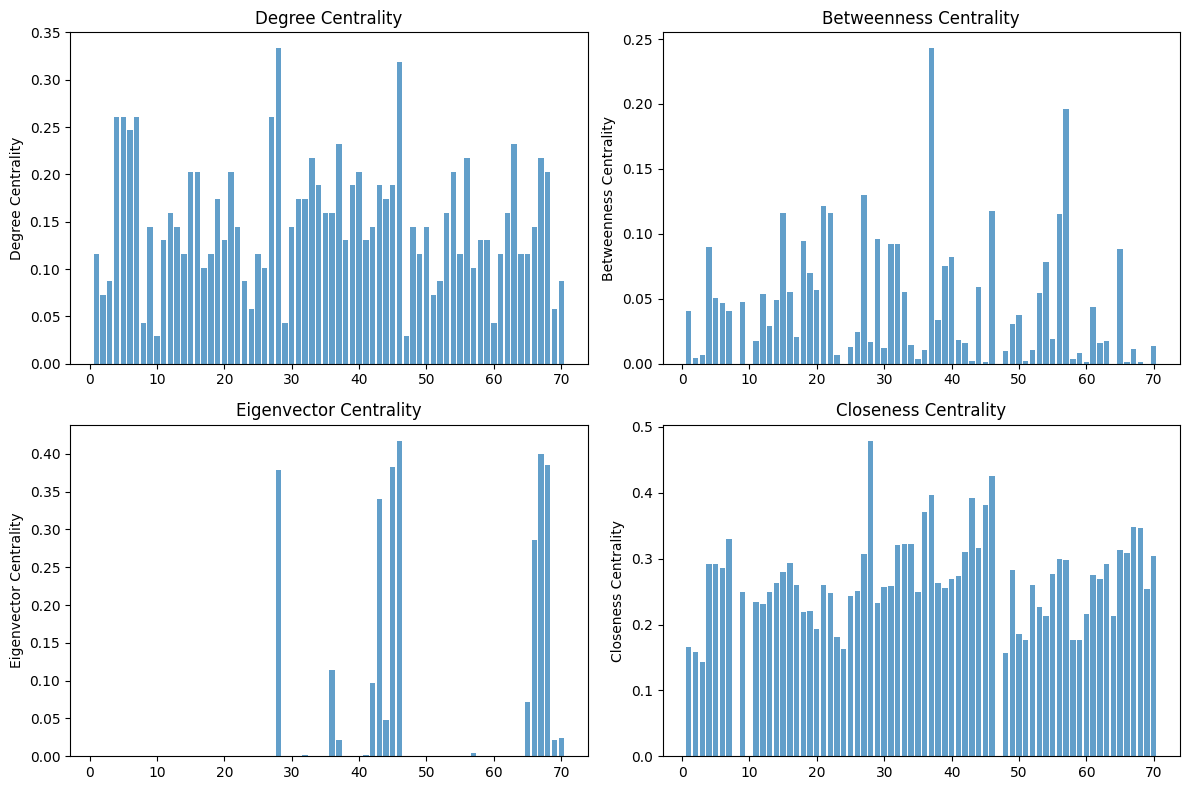

In [43]:
# Create a 2x2 grid of subplots for the four centrality measures
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2)

# Degree Centrality
ax1 = plt.subplot(gs[0, 0])
ax1.bar(centrality_df['Node'], centrality_df['Degree Centrality'], alpha=0.7)
ax1.set_ylabel('Degree Centrality')
ax1.set_title('Degree Centrality')

# Betweenness Centrality
ax2 = plt.subplot(gs[0, 1])
ax2.bar(centrality_df['Node'], centrality_df['Betweenness Centrality'], alpha=0.7)
ax2.set_ylabel('Betweenness Centrality')
ax2.set_title('Betweenness Centrality')

# Eigenvector Centrality
ax3 = plt.subplot(gs[1, 0])
ax3.bar(centrality_df['Node'], centrality_df['Eigenvector Centrality'], alpha=0.7)
ax3.set_ylabel('Eigenvector Centrality')
ax3.set_title('Eigenvector Centrality')

# Closeness Centrality
ax4 = plt.subplot(gs[1, 1])
ax4.bar(centrality_df['Node'], centrality_df['Closeness Centrality'], alpha=0.7)
ax4.set_ylabel('Closeness Centrality')
ax4.set_title('Closeness Centrality')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig(save_path + 'centrality_bar_plots.svg')
plt.show()

In [44]:
# Sort and print Degree Centrality in descending order
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

centrality_measures = pd.DataFrame({
    'Node': [node for node, centrality in sorted_degree_centrality],
    'Degree C.': [centrality for node, centrality in sorted_degree_centrality],
    'Node': [node for node, centrality in sorted_closeness_centrality],
    'Closeness C.': [centrality for node, centrality in sorted_closeness_centrality],
    'Node': [node for node, centrality in sorted_betweenness_centrality],
    'Betweenness': [centrality for node, centrality in sorted_betweenness_centrality],
    'Node': [node for node, centrality in sorted_eigenvector_centrality],
    'Eigenvector C.': [centrality for node, centrality in sorted_eigenvector_centrality]
})

# Display the table
centrality_measures

,Node,Degree C.,Closeness C.,Betweenness,Eigenvector C.
0,46,0.333333,0.479167,0.243001,4.173277e-01
1,67,0.318841,0.425926,0.195886,3.994993e-01
2,68,0.260870,0.396552,0.130311,3.853197e-01
3,45,0.260870,0.392045,0.121314,3.819506e-01
4,28,0.260870,0.381215,0.117903,3.779300e-01
...,...,...,...,...,...
65,2,0.043478,0.157175,0.000000,9.317238e-07
66,3,0.043478,0.142857,0.000000,2.004623e-07
67,8,0.043478,0.000000,0.000000,2.059552e-64
68,10,0.028986,0.000000,0.000000,2.059552e-64


degree:       (28, 0.3333333333333333)
betweenness:  (37, 0.2430013182706424)
closeness:    (28, 0.4791666666666667)
eigenvector:  (46, 0.41732771760194337)


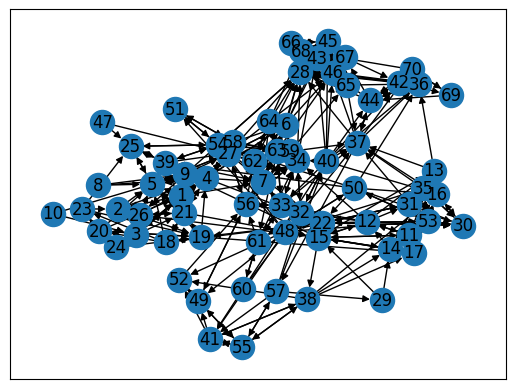

In [45]:
# Comparison
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G,pos)
# lambda function or anonimous function. no name, no return, no def, just use the keyword lambda
# Sintax: lambda argument: manipulate(argument)
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[0]
hub_eigenvector = sorted(eigenvector_centrality.items(),key = lambda x:x[1], reverse=True)[0]
print('degree:      ',hub_degree)
print('betweenness: ',hub_betweenness)
print('closeness:   ',hub_closeness)
print('eigenvector: ',hub_eigenvector)

#### Correlation

In [46]:
print(sp.stats.pearsonr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print(sp.stats.pearsonr(list(betweenness_centrality.values()),list(closeness_centrality.values())))

PearsonRResult(statistic=0.4029844791462889, pvalue=0.0005425752715100596)
PearsonRResult(statistic=0.3095726020799135, pvalue=0.009111681552666447)


In [47]:
# Rank correlation: Spearman and Kendall coefficient
print(sp.stats.spearmanr(list(degree_centrality.values()),list(eigenvector_centrality.values())))
print(sp.stats.kendalltau(list(degree_centrality.values()),list(eigenvector_centrality.values())))

SignificanceResult(statistic=0.4712320310598894, pvalue=3.832268778074045e-05)
SignificanceResult(statistic=0.34977604791698724, pvalue=3.0819070741881995e-05)


### Triangles 

In [48]:
# Compute the number of triangles in the directed graph
triangles = 0

# Iterate over all nodes in the graph
for node in G.nodes():
    neighbors = set(G.neighbors(node))
    # Check for triangles involving the current node
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if G.has_edge(neighbor1, neighbor2):
                triangles += 1

# Since each triangle is counted 3 times (once for each node), divide by 3
triangles //= 3

print("Number of triangles in the directed graph:", triangles)

Number of triangles in the directed graph: 248


In [49]:
print('graph - dictionary keyed by nodes: number of triangles {}'.format(nx.triangles(G.to_undirected())))
print('graph - number of triangles of node labelled 1: {}'.format(nx.triangles(G.to_undirected(),'1')))
print('graph - list of the number of triangles of all nodes: {}'.format(list(nx.triangles(G.to_undirected()).values())))

graph - dictionary keyed by nodes: number of triangles {1: 8, 8: 3, 10: 0, 11: 9, 17: 4, 18: 8, 24: 2, 23: 4, 9: 13, 29: 1, 12: 10, 26: 10, 19: 15, 2: 6, 3: 4, 13: 11, 20: 7, 14: 8, 15: 13, 21: 16, 4: 29, 5: 25, 40: 22, 47: 0, 48: 9, 38: 5, 25: 2, 22: 9, 49: 5, 57: 5, 50: 10, 30: 12, 51: 2, 52: 5, 53: 14, 55: 3, 39: 12, 54: 8, 41: 8, 35: 12, 31: 13, 16: 16, 60: 1, 62: 17, 58: 11, 61: 10, 56: 25, 63: 36, 32: 15, 27: 29, 33: 18, 34: 19, 6: 31, 7: 31, 65: 12, 64: 13, 69: 3, 59: 11, 42: 15, 70: 4, 36: 17, 43: 17, 66: 13, 44: 20, 68: 16, 67: 22, 37: 26, 45: 19, 28: 48, 46: 44}
graph - number of triangles of node labelled 1: {}
graph - list of the number of triangles of all nodes: [8, 3, 0, 9, 4, 8, 2, 4, 13, 1, 10, 10, 15, 6, 4, 11, 7, 8, 13, 16, 29, 25, 22, 0, 9, 5, 2, 9, 5, 5, 10, 12, 2, 5, 14, 3, 12, 8, 8, 12, 13, 16, 1, 17, 11, 10, 25, 36, 15, 29, 18, 19, 31, 31, 12, 13, 3, 11, 15, 4, 17, 17, 13, 20, 16, 22, 26, 19, 48, 44]


### Local Clustering and Average Local Clustering

In [50]:
print('Local clustering: {}'.format(nx.clustering(G)))
print('\nAverage local clustering: {}'.format(nx.average_clustering(G)))

Local clustering: {1: 0.2037037037037037, 8: 0.6666666666666666, 10: 0, 11: 0.4696969696969697, 17: 0.34210526315789475, 18: 0.40384615384615385, 24: 0.5, 23: 0.32142857142857145, 9: 0.29545454545454547, 29: 0.3333333333333333, 12: 0.25471698113207547, 26: 0.55, 19: 0.265625, 2: 0.35, 3: 0.25, 13: 0.26744186046511625, 20: 0.2727272727272727, 14: 0.4230769230769231, 15: 0.2471264367816092, 21: 0.32558139534883723, 4: 0.26174496644295303, 5: 0.2635135135135135, 40: 0.2111111111111111, 47: 0, 48: 0.19318181818181818, 38: 0.22058823529411764, 25: 0.32, 22: 0.29069767441860467, 49: 0.26, 57: 0.225, 50: 0.26744186046511625, 30: 0.5, 51: 0.625, 52: 0.39285714285714285, 53: 0.5, 55: 0.3333333333333333, 39: 0.32432432432432434, 54: 0.1686046511627907, 41: 0.3382352941176471, 35: 0.4215686274509804, 31: 0.3790322580645161, 16: 0.2727272727272727, 60: 0.5, 62: 0.5490196078431373, 58: 0.36764705882352944, 61: 0.46153846153846156, 56: 0.28431372549019607, 63: 0.36324786324786323, 32: 0.333333333333

In [51]:
# computing point statistics
local_clustering=nx.clustering(G)
list_local_clustering=list(local_clustering.values())
print('Mean local clustering: {}'.format(np.mean(list_local_clustering)))
print('\nStandard deviation local clustering: {}'.format(np.std(list_local_clustering)))

Mean local clustering: 0.36244993103940853

Standard deviation local clustering: 0.15010553048146863


### Transitivity

In [52]:
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity:.4f}")

Transitivity: 0.4052


### Motif

In [53]:
tc = nx.triadic_census(G)
tc

{'003': 38079,
 '012': 9822,
 '102': 5175,
 '021D': 166,
 '021U': 281,
 '021C': 275,
 '111D': 368,
 '111U': 206,
 '030T': 66,
 '030C': 4,
 '201': 61,
 '120D': 70,
 '120U': 34,
 '120C': 26,
 '210': 66,
 '300': 41}

In [54]:
mapping = {'003': 13, ####null triad
 '012': 14, #### diadic
 '102': 15, #### diadic
 '021D': 0,  '021U': 3,  '021C': 1,  '111D': 4,  '111U': 2,  '030T': 6,
 '030C': 7, '201': 5,  '120D': 10,  '120U': 8,  '120C': 9,  '210': 11,
 '300': 12
}


In [55]:
tc_numbers = { mapping[k]:v for k,v in tc.items() }

In [56]:
dict(sorted(tc_numbers.items()))

{0: 166,
 1: 275,
 2: 206,
 3: 281,
 4: 368,
 5: 61,
 6: 66,
 7: 4,
 8: 34,
 9: 26,
 10: 70,
 11: 66,
 12: 41,
 13: 38079,
 14: 9822,
 15: 5175}

### Social bridges and strength

In [57]:
import names
names.get_full_name()

'Steven Shepherd'

In [58]:
random_names = { i:names.get_full_name() for i in range(G.order()) }

In [59]:
len(random_names), len(set(random_names))

(70, 70)

In [60]:
random_names[0]

'Ann Lofton'

In [61]:
nx.set_node_attributes(G, random_names, "name")

#### Bridges (to be implemented\understood)

In [62]:
G_undirected = G.to_undirected()

In [63]:

nx.has_bridges(G_undirected)

False

In [64]:
len([ br for br in nx.bridges(G_undirected, root=None)])

0

In [65]:
nx.set_edge_attributes(G, 0, name="is_bridge")

In [66]:
for br in nx.bridges(G_undirected, root=None):
    #print("edge (src,target):", br)
    src,target = br
    if G.has_edge(src,target):
        G[src][target]['is_bridge'] = 1 
    
    if  G.has_edge(target,src):
        G[target][src]['is_bridge'] = 1 

In [67]:
#Local Bridges
nx.set_edge_attributes(G, 0, name="is_local_bridge")

In [68]:
for br in nx.local_bridges(G_undirected, with_span=False, weight=None):
    #print("edge (src,target, span):", br)
    src, target = br
    
    if G.has_edge(src,target):
        G[src][target]['is_local_bridge'] = 1 
    
    if  G.has_edge(target,src):
        G[target][src]['is_local_bridge'] = 1 

In [69]:
nx.write_gexf(G=G,path="blogs.gexf")

In [70]:
for u,v in G_undirected.edges():
    
    neighbors_v = set(G_undirected.neighbors(u))
    neighbors_u = set(G_undirected.neighbors(v))
    
    den = len( neighbors_v.intersection(neighbors_u) )
    
    num = len( neighbors_v.union(neighbors_u) )
    
    overlap = den/num
    
    if G.has_edge(u,v):
        G[u][v]['neighborhood_overlap'] = overlap 
    
    if  G.has_edge(v,u):
        G[v][u]['neighborhood_overlap'] = overlap
        
    #break

# 3 Community Detection

In [71]:
# Convert the directed graph to an undirected graph
G_undirected_1 = G.to_undirected()

# Apply the Louvain community detection algorithm on the undirected graph
partition = community_louvain.best_partition(G_undirected_1, weight='weight')

# Print the results
#print("Community Detection Results:")
#for node, community_id in partition.items():
 #   print(f"Node {node} belongs to Community {community_id}")
  #  print(f"Node {node} belongs to Community {community_id}")

In [72]:
# Get the number of communities
num_partition = max(partition.values()) + 1

# Generate a list of unique colors for communities
colors = plt.cm.Pastel1(np.linspace(0, 1, num_partition))

# Create a color map that maps community IDs to colors
color_map = {partition_id: color for partition_id, color in zip(range(num_partition), colors)}

# Create a list of colors for each node based on their community
node_colors = [color_map[partition[node]] for node in G_undirected_1.nodes]

/Users/marwan/miniconda3/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


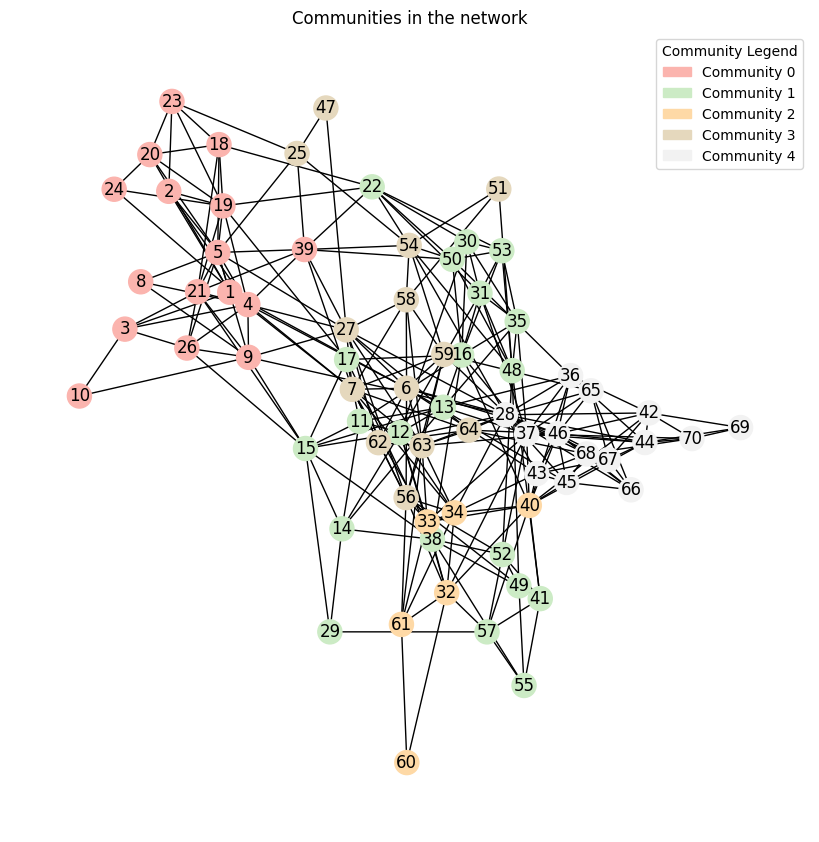

In [73]:

# Create a legend with labels for each community
legend_labels = []
legend_patches = []

for community_id in range(num_partition):
    label = f'Community {community_id}'
    legend_labels.append(label)
    color = colors[community_id]
    patch = mpatches.Patch(color=color, label=label)
    legend_patches.append(patch)

# Add the legend to the plot

pos_partition = nx.spring_layout(G_undirected_1, seed=42)  # Adjust the layout as needed
plt.figure(figsize=(8, 8))
nx.draw(G_undirected_1, pos_partition, node_color=node_colors, with_labels=True, cmap=plt.cm.viridis, node_size=300)
plt.title("Communities in the network")
plt.legend(handles=legend_patches, title='Community Legend')
plt.savefig(save_path + "community_detection.svg", bbox_inches='tight', dpi = 1000)
plt.show()

In [74]:
# Count and display the number of nodes in each community
partition_counts = {partition_id: sum(1 for node in partition if partition[node] == partition_id) for partition_id in range(num_partition)}
print("Nodes in each partition:")
for partition_id, count in partition_counts.items():
    print(f"Partition {partition_id}: {count} nodes")

Nodes in each partition:
Partition 0: 16 nodes
Partition 1: 21 nodes
Partition 2: 6 nodes
Partition 3: 13 nodes
Partition 4: 14 nodes


In [75]:
#Community overlapping
node_communities = {node: [] for node in G_undirected_1.nodes}

# Populate the node_communities dictionary with community assignments
for node, comm_id in partition.items():
    node_communities[node].append(comm_id)

# Find nodes with overlapping communities
overlapping_nodes = {node: communities for node, communities in node_communities.items() if len(communities) > 1}

overlapping_nodes

{}

In [76]:
#Small world effect
# Find connected components in the graph
connected_components = list(nx.connected_components(G_undirected_1))

# Define a threshold for what you consider a "small" component
threshold_size = 1# You can adjust this threshold as needed

# Identify and analyze small network components
small_components = [comp for comp in connected_components if len(comp) <= threshold_size]
print(small_components)

[]


In [132]:
# Analyze Community Size
community_sizes = [len([node for node in G_undirected_1.nodes if partition[node] == comm_id]) for comm_id in range(num_partition)]
print("Community Sizes:", community_sizes)

# Analyze Community Connectivity
for comm_id in range(num_partition):
    community = [node for node in G_undirected_1.nodes if partition[node] == comm_id]
    subgraph = G_undirected_1.subgraph(community)
    avg_degree = sum(dict(subgraph.degree()).values()) / len(community)
    density = nx.density(subgraph)
    print(f"Community {comm_id} Connectivity - Average Degree:", avg_degree)
    print(f"Community {comm_id} Connectivity - Density:", density)

# Analyze Community Roles
# You can analyze roles based on centrality measures, such as degree centrality or betweenness centrality, within each community.
for comm_id in range(num_partition):
    community = [node for node in G_undirected_1.nodes if partition[node] == comm_id]
    subgraph = G_undirected_1.subgraph(community)
    
    # Calculate centrality measures for nodes in the community
    degree_centrality = nx.degree_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    threshold_value = 0.65
    # Identify central nodes (you can define your criteria for centrality)
    central_nodes_degree = [node for node in community if degree_centrality[node] > threshold_value]
    #central_nodes_betweenness = [node for node in community if betweenness_centrality[node] > threshold_value]
    
    print(f"Community {comm_id} Central Nodes (centrality):", central_nodes_degree)
    #print(f"Community {comm_id} Central Nodes (betwenneess):", central_nodes_betweenness)


Community Sizes: [16, 21, 6, 13, 14]
Community 0 Connectivity - Average Degree: 5.625
Community 0 Connectivity - Density: 0.375
Community 1 Connectivity - Average Degree: 5.619047619047619
Community 1 Connectivity - Density: 0.28095238095238095
Community 2 Connectivity - Average Degree: 3.6666666666666665
Community 2 Connectivity - Density: 0.7333333333333333
Community 3 Connectivity - Average Degree: 5.384615384615385
Community 3 Connectivity - Density: 0.44871794871794873
Community 4 Connectivity - Average Degree: 6.857142857142857
Community 4 Connectivity - Density: 0.5274725274725275
Community 0 Central Nodes (centrality): [4, 5]
Community 1 Central Nodes (centrality): []
Community 2 Central Nodes (centrality): [61, 32, 33, 34]
Community 3 Central Nodes (centrality): [63, 27, 7]
Community 4 Central Nodes (centrality): [67, 28, 46]


Interpretation:
- The Louvain method partitions the nodes of your network into communities or groups. Each node is assigned to a community, and the results are displayed as node-community associations.
- Nodes that belong to the same community are more closely connected to each other than to nodes in other communities. Communities can represent functional groups, cliques, or clusters of nodes with similar characteristics or interactions.
- The Louvain method aims to maximize modularity, which measures the quality of the community structure. Higher modularity values indicate a better community structure.
- You can analyze the resulting communities to gain insights into the organization and structure of your network. For example, you can examine the size of communities, the nodes that act as connectors between communities, and the overall modularity of the partition.
- Community detection can be particularly useful for understanding social networks, web networks, or any network where nodes naturally form groups.

After applying the Louvain method, you can explore the communities in your network and assess their significance based on your research goals.

#### NetworkX greedy modularity optimization

In [78]:
import networkx.algorithms.community as nx_comm

In [79]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
print(list_community_sets_greedy)

[frozenset({1, 2, 3, 4, 5, 8, 9, 10, 18, 19, 20, 21, 23, 24, 25, 26, 27, 39, 47}), frozenset({65, 66, 67, 68, 36, 37, 69, 70, 40, 42, 43, 44, 45, 46, 28}), frozenset({32, 64, 33, 34, 6, 7, 60, 61, 62, 63}), frozenset({35, 16, 48, 50, 53, 22, 30, 31}), frozenset({17, 29, 11, 12, 13, 14, 15}), frozenset({49, 52, 38, 55, 56, 41, 57}), frozenset({59, 58, 51, 54})]


In [80]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print(i,comm)
    for n in comm:
        partition_greedy[n]=i


Community: 0
0 frozenset({1, 2, 3, 4, 5, 8, 9, 10, 18, 19, 20, 21, 23, 24, 25, 26, 27, 39, 47})
Community: 1
1 frozenset({65, 66, 67, 68, 36, 37, 69, 70, 40, 42, 43, 44, 45, 46, 28})
Community: 2
2 frozenset({32, 64, 33, 34, 6, 7, 60, 61, 62, 63})
Community: 3
3 frozenset({35, 16, 48, 50, 53, 22, 30, 31})
Community: 4
4 frozenset({17, 29, 11, 12, 13, 14, 15})
Community: 5
5 frozenset({49, 52, 38, 55, 56, 41, 57})
Community: 6
6 frozenset({59, 58, 51, 54})


In [81]:
nx.set_node_attributes(G, partition_greedy, "community_nx_greedy")

In [82]:
def draw_graph_with_communities(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

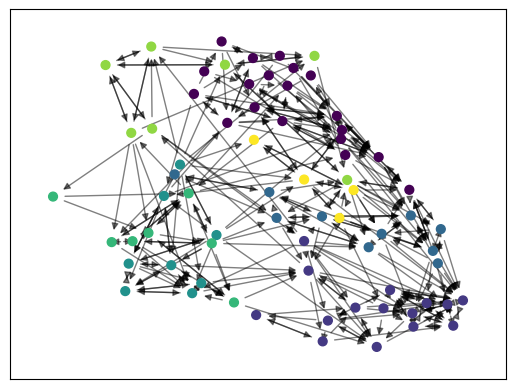

In [83]:
draw_graph_with_communities(G,partition_greedy)

# 4 Path Analysis

In [84]:
# Choose two nodes for which you want to find the shortest path
source_node = 28  # Replace with the actual node name
target_node = 70  # Replace with the actual node name

# Calculate the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source=source_node, target=target_node)

# Calculate the length (number of edges) of the shortest path
path_length = nx.shortest_path_length(G, source=source_node, target=target_node)

# Print the results
print(f"Shortest Path from {source_node} to {target_node}: {shortest_path}")
print(f"Path Length: {path_length} edges")

Shortest Path from 28 to 70: [28, 67, 42, 70]
Path Length: 3 edges


Interpretation:
- In this code, we choose two nodes (source_node and target_node) for which we want to find the shortest path.
- We use Dijkstra's algorithm to calculate the shortest path between these nodes. The result is a list of nodes representing the path.
- We also calculate the length of the shortest path, which is the number of edges (or steps) in the path.

Interpreting the results:
- The shortest_path list contains the nodes that make up the shortest path from the source to the target. You can examine the nodes along this path to understand how information or influence might flow between them.
- The path_length represents the number of edges in the shortest path. This value provides insight into the efficiency of communication or interaction between the two nodes. A shorter path implies more direct communication.

# 5 Clustering Coefficients

In [85]:
# Calculate the clustering coefficients for each node
clustering_coefficients = nx.clustering(G)

# Calculate the average clustering coefficient for the entire network
average_clustering_coefficient = nx.average_clustering(G)

# Print the results
print("Clustering Coefficients:")
for node, coefficient in clustering_coefficients.items():
    print(f"Node {node}: {coefficient:.4f}")

print(f"\nAverage Clustering Coefficient: {average_clustering_coefficient:.4f}")

Clustering Coefficients:
Node 1: 0.2037
Node 8: 0.6667
Node 10: 0.0000
Node 11: 0.4697
Node 17: 0.3421
Node 18: 0.4038
Node 24: 0.5000
Node 23: 0.3214
Node 9: 0.2955
Node 29: 0.3333
Node 12: 0.2547
Node 26: 0.5500
Node 19: 0.2656
Node 2: 0.3500
Node 3: 0.2500
Node 13: 0.2674
Node 20: 0.2727
Node 14: 0.4231
Node 15: 0.2471
Node 21: 0.3256
Node 4: 0.2617
Node 5: 0.2635
Node 40: 0.2111
Node 47: 0.0000
Node 48: 0.1932
Node 38: 0.2206
Node 25: 0.3200
Node 22: 0.2907
Node 49: 0.2600
Node 57: 0.2250
Node 50: 0.2674
Node 30: 0.5000
Node 51: 0.6250
Node 52: 0.3929
Node 53: 0.5000
Node 55: 0.3333
Node 39: 0.3243
Node 54: 0.1686
Node 41: 0.3382
Node 35: 0.4216
Node 31: 0.3790
Node 16: 0.2727
Node 60: 0.5000
Node 62: 0.5490
Node 58: 0.3676
Node 61: 0.4615
Node 56: 0.2843
Node 63: 0.3632
Node 32: 0.3333
Node 27: 0.2703
Node 33: 0.3687
Node 34: 0.3667
Node 6: 0.3258
Node 7: 0.3108
Node 65: 0.4630
Node 64: 0.4630
Node 69: 0.6000
Node 59: 0.2429
Node 42: 0.4070
Node 70: 0.2857
Node 36: 0.3302
Node 43:

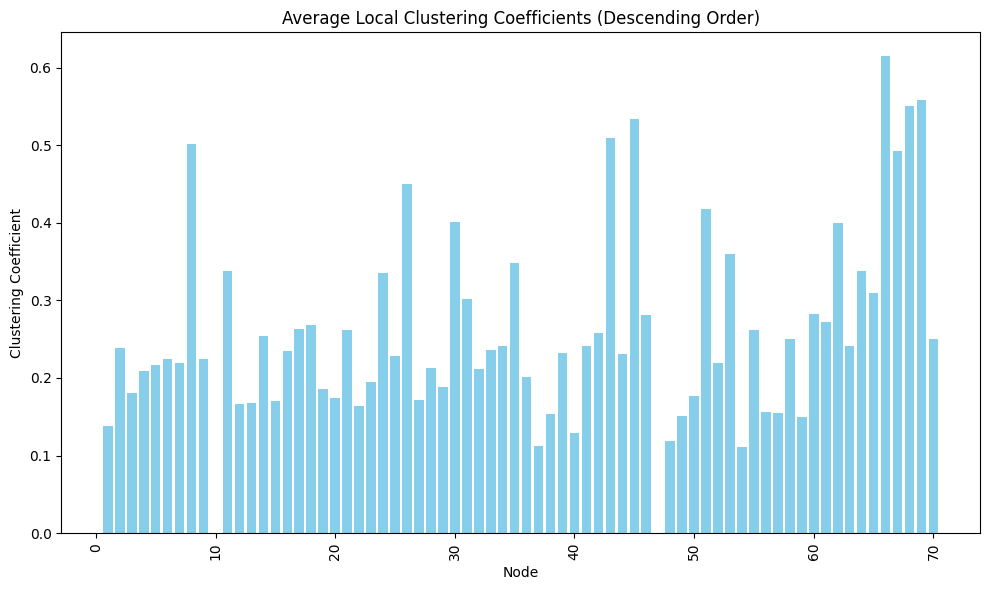

In [119]:
# Sort the nodes by clustering coefficient in descending order
sorted_coefficients = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)

# Extract the nodes and coefficients in sorted order
nodes, coefficients = zip(*sorted_coefficients)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(nodes, coefficients, color='skyblue')
plt.xlabel('Node')
plt.ylabel('Clustering Coefficient')
plt.title('Average Local Clustering Coefficients (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig(save_path + "clustering_coefficient.svg", bbox_inches='tight', dpi = 1000)

# Show the plot
plt.show()

Interpreting the results:

- Node Clustering Coefficient: The clustering coefficient for an individual node measures how closely its neighbors are connected to each other. A high clustering coefficient for a node suggests that its neighbors tend to form a cluster around it. Nodes with high clustering coefficients are often part of tightly connected groups.
- Average Clustering Coefficient: The average clustering coefficient represents the average tendency of nodes in the network to form clusters. A higher average clustering coefficient indicates a network with more clustering or cliquish behavior. It's a measure of the network's overall tendency for nodes to connect to their neighbors.

Interpretation of clustering coefficients depends on the context of your network:
- In social networks, high clustering coefficients might indicate the presence of friend groups or communities.
- In collaboration networks, they could indicate research or collaboration groups.
- In biological networks, they might signify functional modules.

# 6 Network Visualization

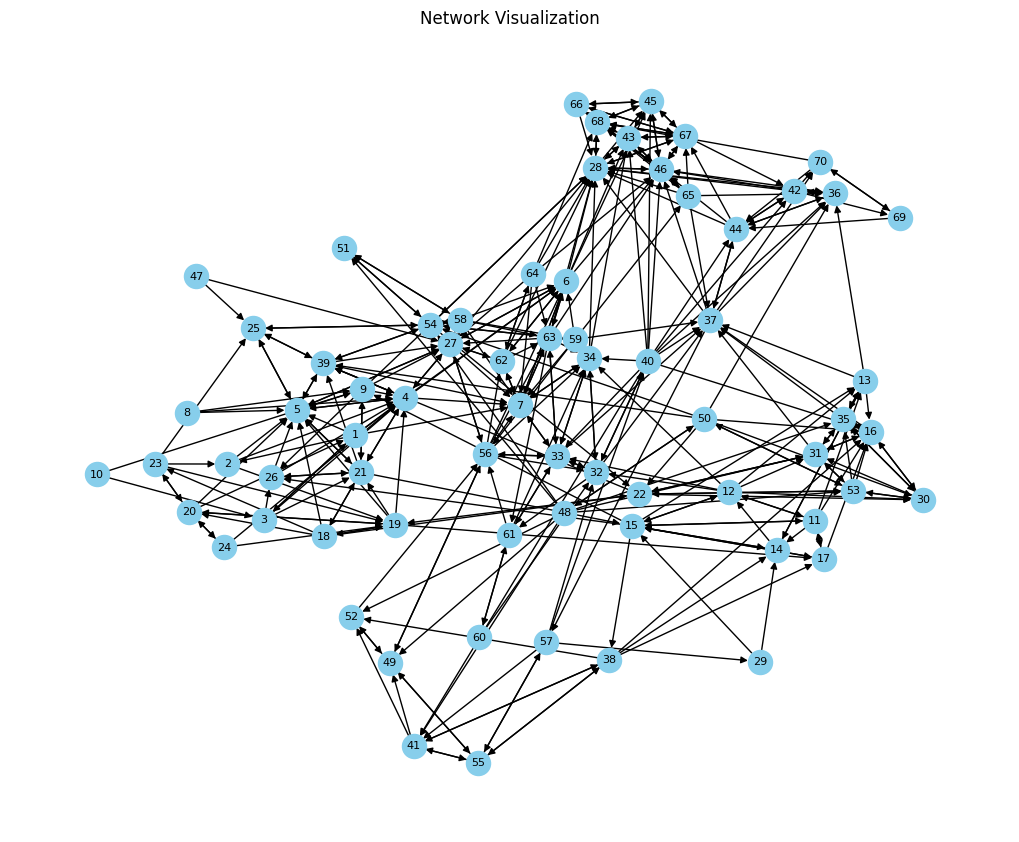

In [86]:
# Choose a layout for network visualization (e.g., spring_layout, circular_layout, etc.)
# Here, I'm using the spring_layout as an example:
pos = nx.spring_layout(G, seed=42)

# Draw the network
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black')
plt.title("Network Visualization")
plt.show()

Interpreting the visualization:
- Node Placement: The layout you choose (e.g., spring layout, circular layout) determines how nodes are positioned in the visualization. Nodes that are closer in the layout are more connected in the network.
- Node Size and Color: You can customize node size and color based on node attributes. For example, you could use node size to represent degree centrality or node color to represent community membership.
- Edge Thickness: Edge thickness can be used to represent edge weights or other attributes. Thicker edges can indicate stronger connections.
- Overall Structure: Visual inspection of the network can reveal its overall structure, including the presence of clusters, hubs, and any isolated nodes.
- Community Detection: If you've performed community detection, you can color nodes based on their community memberships to visualize the identified groups.
- Centrality Visualization: You can visually highlight nodes with high centrality measures, such as degree centrality or betweenness centrality, to identify key players in the network.

# 7 Centrality Visualization

In [87]:
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity: {assortativity:.4f}")

Assortativity: 0.0795


Assortativity: Assortativity measures the tendency of nodes to connect to similar nodes. Positive assortativity indicates that nodes with similar attributes (e.g., degree, age) tend to connect to each other, while negative assortativity suggests the opposite

# 8 Statistical Analysis

In [88]:
# Function to simulate random node failure
def simulate_random_node_failure(G_undirected_1):
    random_node = random.choice(list(G_undirected_1.nodes))
    G_removed = G_undirected_1.copy()
    G_removed.remove_node(random_node)
    return G_removed

# Perform multiple simulations and measure network connectivity
num_simulations = 100
initial_size = len(G_undirected_1.nodes)
largest_connected_sizes = []

for _ in range(num_simulations):
    G_removed = simulate_random_node_failure(G_undirected_1)
    largest_connected_sizes.append(len(max(nx.connected_components(G_removed), key=len)) / initial_size)

# Calculate the average size of the largest connected component after failures
average_largest_connected_size = sum(largest_connected_sizes) / num_simulations

print(f"Average Largest Connected Size after Random Node Failures: {average_largest_connected_size:.4f}")


Average Largest Connected Size after Random Node Failures: 0.9857


Random Failures:
Simulate random node or edge failures and measure the impact on network connectivity.

In [89]:
# Function to simulate targeted node attack
def simulate_targeted_node_attack(G_undirected_1):
    highest_degree_node = max(G_undirected_1.degree, key=lambda x: x[1])[0]
    G_removed = G_undirected_1.copy()
    G_removed.remove_node(highest_degree_node)
    return G_removed

# Perform multiple simulations and measure network connectivity
largest_connected_sizes = []

for _ in range(num_simulations):
    G_removed = simulate_targeted_node_attack(G_undirected_1)
    largest_connected_sizes.append(len(max(nx.connected_components(G_removed), key=len)) / initial_size)

# Calculate the average size of the largest connected component after attacks
average_largest_connected_size = sum(largest_connected_sizes) / num_simulations

print(f"Average Largest Connected Size after Targeted Node Attacks: {average_largest_connected_size:.4f}")


Average Largest Connected Size after Targeted Node Attacks: 0.9857


Interpretation:

- In both code examples, we simulate random failures or targeted attacks on nodes and measure the size of the largest connected component in the network after each simulation.
- The average_largest_connected_size represents the average size of the largest connected component after multiple simulations. It provides insight into the network's robustness.
- A higher average_largest_connected_size indicates greater robustness, as it implies that the network remains more connected even after failures or attacks.
- Robustness analysis helps you understand how resilient your network is to disruptions. It can inform strategies for network maintenance and protection.

In [90]:
# Define parameters for influence propagation
initial_seed_node = 'Node1'  # Choose a starting node for influence propagation
num_iterations = 1000  # Number of propagation iterations
influence_prob = 0.1  # Probability of influence transmission from one node to its neighbor

# Create a dictionary to keep track of nodes and their influence status (1 for influenced, 0 for not influenced)
influence_status = {node: 0 for node in G.nodes()}
influence_status[initial_seed_node] = 1  # Seed node is influenced

# Perform influence propagation
for _ in range(num_iterations):
    # Randomly select a node to propagate influence
    node_to_propagate = random.choice(list(G.nodes()))

    # Check if the selected node is influenced and has neighbors
    if influence_status[node_to_propagate] == 1 and G.out_degree(node_to_propagate) > 0:
        for neighbor in G.neighbors(node_to_propagate):
            # Propagate influence to neighbors with a probability
            if random.random() < influence_prob:
                influence_status[neighbor] = 1

# Calculate the proportion of influenced nodes
num_influenced_nodes = sum(influence_status.values())
proportion_influenced = num_influenced_nodes / len(G.nodes())

# Print the results
print(f"Initial seed node: {initial_seed_node}")
print(f"Number of influenced nodes: {num_influenced_nodes}")
print(f"Proportion of influenced nodes: {proportion_influenced:.4f}")

Initial seed node: Node1
Number of influenced nodes: 1
Proportion of influenced nodes: 0.0143


In [91]:
# Calculate the proportion of influenced nodes
num_influenced_nodes = sum(influence_status.values())
proportion_influenced = num_influenced_nodes / len(G.nodes())

# Analyze cascade sizes
cascade_sizes = [sum(influence_status.values())]  # Size of the initial cascade
for _ in range(num_iterations):
    # Perform another iteration of influence propagation
    # (You may need to reset influence_status to its initial state)
    # Update cascade size for each iteration
    cascade_size = sum(influence_status.values())
    cascade_sizes.append(cascade_size)

# Print the results
print(f"Proportion of influenced nodes: {proportion_influenced:.4f}")
print(f"Cascade Sizes: {cascade_sizes}")

Proportion of influenced nodes: 0.0143
Cascade Sizes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### 9) Triadic Disclosure

In [92]:
# Compute the triadic closure for each node
triadic_closure_dict = {}

for node in G.nodes():
    # Get the neighbors of the current node
    neighbors = list(G.neighbors(node))
    
    # Initialize a counter for triadic closures
    triadic_closure_count = 0
    
    # Check for triadic closures
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if G.has_edge(neighbors[i], neighbors[j]) or G.has_edge(neighbors[j], neighbors[i]):
                triadic_closure_count += 1
    
    # Store the triadic closure count in the dictionary
    triadic_closure_dict[node] = triadic_closure_count

# Sort nodes by triadic closure count in descending order
sorted_nodes_by_triadic_closure = sorted(triadic_closure_dict, key=lambda node: triadic_closure_dict[node], reverse=True)

# Print or use the sorted nodes by triadic closure count
print("Nodes sorted by triadic closure count:")
for node in sorted_nodes_by_triadic_closure:
    print(f"Node {node}: Triadic Closure Count {triadic_closure_dict[node]}")

Nodes sorted by triadic closure count:
Node 40: Triadic Closure Count 19
Node 46: Triadic Closure Count 19
Node 56: Triadic Closure Count 17
Node 6: Triadic Closure Count 16
Node 67: Triadic Closure Count 16
Node 68: Triadic Closure Count 14
Node 62: Triadic Closure Count 13
Node 63: Triadic Closure Count 13
Node 33: Triadic Closure Count 13
Node 64: Triadic Closure Count 13
Node 44: Triadic Closure Count 12
Node 21: Triadic Closure Count 11
Node 53: Triadic Closure Count 11
Node 58: Triadic Closure Count 11
Node 27: Triadic Closure Count 11
Node 65: Triadic Closure Count 11
Node 15: Triadic Closure Count 10
Node 50: Triadic Closure Count 10
Node 43: Triadic Closure Count 10
Node 66: Triadic Closure Count 10
Node 28: Triadic Closure Count 10
Node 11: Triadic Closure Count 9
Node 9: Triadic Closure Count 9
Node 4: Triadic Closure Count 9
Node 48: Triadic Closure Count 9
Node 42: Triadic Closure Count 9
Node 45: Triadic Closure Count 9
Node 18: Triadic Closure Count 8
Node 1: Triadic Clo

In [93]:
# Calculate the global clustering coefficient
global_clustering_coefficient = nx.average_clustering(G, weight='weight')

# Calculate local clustering coefficients for all nodes
local_clustering_coefficients = nx.clustering(G, weight='weight')

# Print the global clustering coefficient
print(f"Global Clustering Coefficient: {global_clustering_coefficient:.4f}")

# Print local clustering coefficients for all nodes
print("Local Clustering Coefficients:")
for node, clustering_coefficient in local_clustering_coefficients.items():
    print(f"Node {node}: Local Clustering Coefficient = {clustering_coefficient:.4f}")

Global Clustering Coefficient: 0.2577
Local Clustering Coefficients:
Node 1: Local Clustering Coefficient = 0.1380
Node 8: Local Clustering Coefficient = 0.5018
Node 10: Local Clustering Coefficient = 0.0000
Node 11: Local Clustering Coefficient = 0.3381
Node 17: Local Clustering Coefficient = 0.2629
Node 18: Local Clustering Coefficient = 0.2679
Node 24: Local Clustering Coefficient = 0.3347
Node 23: Local Clustering Coefficient = 0.1944
Node 9: Local Clustering Coefficient = 0.2250
Node 29: Local Clustering Coefficient = 0.1883
Node 12: Local Clustering Coefficient = 0.1661
Node 26: Local Clustering Coefficient = 0.4500
Node 19: Local Clustering Coefficient = 0.1853
Node 2: Local Clustering Coefficient = 0.2385
Node 3: Local Clustering Coefficient = 0.1809
Node 13: Local Clustering Coefficient = 0.1678
Node 20: Local Clustering Coefficient = 0.1744
Node 14: Local Clustering Coefficient = 0.2541
Node 15: Local Clustering Coefficient = 0.1698
Node 21: Local Clustering Coefficient = 0.2

# Link strength and reciprocity

In [94]:
# Calculate the average link weight
average_weight = sum([data['weight'] for _, _, data in G.edges(data=True)]) / len(G.edges)
print(f"Average Link Weight: {average_weight:.4f}")

Average Link Weight: 1.3825


# Node degree and strenght correlation

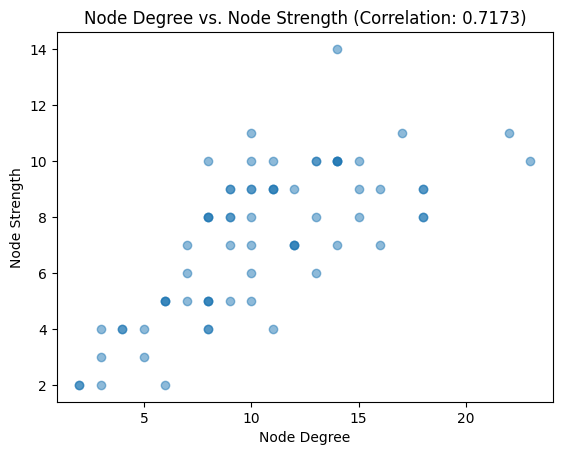

In [95]:
# Calculate node degrees and strengths
node_degrees = dict(G.degree())
node_strengths = {node: sum(data['weight'] for _, data in G[node].items()) for node in G.nodes}

# Calculate correlation
degrees = list(node_degrees.values())
strengths = list(node_strengths.values())
correlation = np.corrcoef(degrees, strengths)[0, 1]

# Create a scatter plot to visualize the correlation
plt.scatter(degrees, strengths, alpha=0.5)
plt.xlabel("Node Degree")
plt.ylabel("Node Strength")
plt.title(f"Node Degree vs. Node Strength (Correlation: {correlation:.4f})")
plt.show()

# Reciprocity

In [112]:
# Calculate reciprocity
reciprocity = nx.reciprocity(G)
print(f"Reciprocity: {reciprocity:.4f}")

Reciprocity: 0.5027


# Directed vs Undirected graph

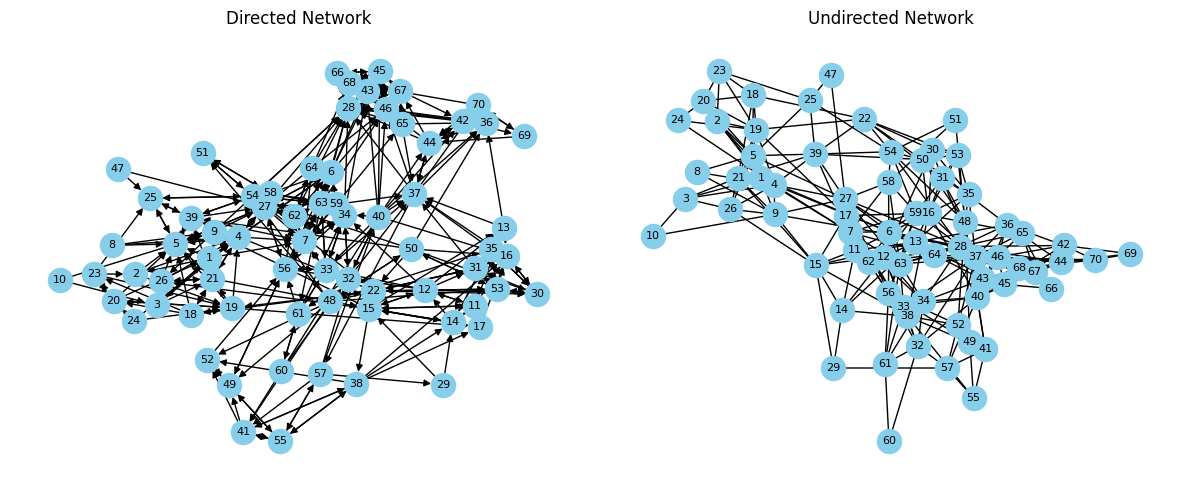

In [97]:
# Visualize the directed graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, seed=42)  # Choose an appropriate layout
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black', arrows=True)
plt.title("Directed Network")

# Create an undirected version of the graph
G_undirected = G.to_undirected()

# Visualize the undirected graph
plt.subplot(1, 2, 2)
pos_undirected = nx.spring_layout(G_undirected, seed=42)
nx.draw(G_undirected, pos_undirected, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black')
plt.title("Undirected Network")
plt.tight_layout()
plt.show()

# Transitivity

In [113]:
# Calculate transitivity
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity:.4f}")

Transitivity: 0.4052


# Triadic Closure Analysis

In [115]:
# Initialize a counter for open triangles
open_triangles = 0

# Iterate through nodes and their neighbors to find open triangles
for node in G.nodes:
    neighbors = set(G.neighbors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 != neighbor2 and not G.has_edge(neighbor1, neighbor2):
                open_triangles += 1

# Print the number of open triangles
print(f"Number of Open Triangles: {open_triangles}")

Number of Open Triangles: 1092


# Clustering coefficient

In [114]:
# Calculate the clustering coefficients for each node
clustering_coefficients = nx.clustering(G, weight = 'weight')

# Calculate the average clustering coefficient for the entire network
average_clustering_coefficient = nx.average_clustering(G, weight = 'weight')

# Print the results
#print("Clustering Coefficients:")
#for node, coefficient in clustering_coefficients.items():
#    print(f"Node {node}: {coefficient:.4f}")

print(f"\nAverage Clustering Coefficient: {average_clustering_coefficient:.4f}")


Average Clustering Coefficient: 0.2577


# ego-network visualization

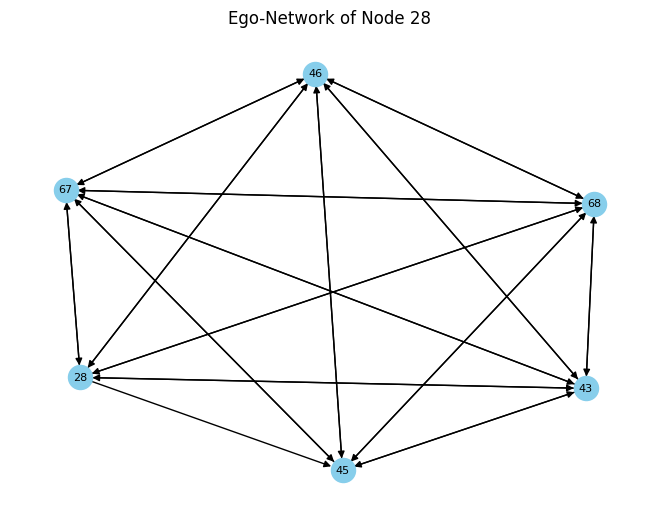

In [133]:
# Choose an ego node for analysis
ego_node = 28

# Extract the ego-network
ego_network = nx.ego_graph(G, ego_node)

# Visualize the ego-network
pos = nx.spring_layout(ego_network, seed=42)  # Choose an appropriate layout
nx.draw(ego_network, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_color='black')
plt.title(f"Ego-Network of Node {ego_node}")
plt.show()

In [134]:
# Choose an ego node for analysis

# Extract the ego-network
ego_network = nx.ego_graph(G, ego_node)

# Calculate degree centrality for nodes in the ego-network
degree_centrality = nx.degree_centrality(ego_network)

# Calculate clustering coefficient for nodes in the ego-network
clustering_coefficient = nx.clustering(ego_network)


# Calculate betweenness centrality for nodes in the ego-network
betweenness_centrality = nx.betweenness_centrality(ego_network)

# Print the metrics for each node in the ego-network
for node in ego_network.nodes:
    print(f"Node {node}:")
    print(f"Degree Centrality: {degree_centrality[node]:.4f}")
    print(f"Clustering Coefficient: {clustering_coefficient[node]:.4f}")
    print(f"Betweenness Centrality: {betweenness_centrality[node]:.4f}")
    print()

Node 67:
Degree Centrality: 2.0000
Clustering Coefficient: 0.9500
Betweenness Centrality: 0.0125

Node 68:
Degree Centrality: 2.0000
Clustering Coefficient: 0.9500
Betweenness Centrality: 0.0125

Node 43:
Degree Centrality: 2.0000
Clustering Coefficient: 0.9500
Betweenness Centrality: 0.0125

Node 45:
Degree Centrality: 1.8000
Clustering Coefficient: 1.0000
Betweenness Centrality: 0.0000

Node 46:
Degree Centrality: 2.0000
Clustering Coefficient: 0.9500
Betweenness Centrality: 0.0125

Node 28:
Degree Centrality: 1.8000
Clustering Coefficient: 1.0000
Betweenness Centrality: 0.0000



# ego-network visualization for multiple nodes

In [103]:
# Choose a list of ego nodes for analysis
ego_nodes = [1,2,3,4,5,6]

# Analyze ego-networks for each ego node
for ego_node in ego_nodes:
    ego_network = nx.ego_graph(G, ego_node)
    
    # Calculate and print ego-network metrics as shown in the previous code example
    # (Degree centrality, clustering coefficient, betweenness centrality)

# Node similarity

In [104]:
# Choose two nodes for similarity analysis
node1 = 34
node2 = 12

# Calculate Jaccard similarity
jaccard_similarity = nx.jaccard_coefficient(G_undirected, [(node1, node2)])
for u, v, similarity in jaccard_similarity:
    print(f"Jaccard Similarity between {u} and {v}: {similarity:.4f}")

Jaccard Similarity between 34 and 12: 0.1176


In [105]:
# Initialize a dictionary to store Jaccard similarities for all node pairs
jaccard_similarities = {}

# Iterate through all pairs of nodes in the graph
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:  # Avoid comparing a node with itself
            # Calculate Jaccard similarity for the neighbors of node1 and node2
            neighbors_node1 = set(G.successors(node1))  # Neighbors of node1
            neighbors_node2 = set(G.successors(node2))  # Neighbors of node2

            intersection = len(neighbors_node1.intersection(neighbors_node2))
            union = len(neighbors_node1.union(neighbors_node2))

            # Calculate Jaccard similarity
            if union == 0:
                jaccard_similarity = 0  # Avoid division by zero if there are no common neighbors
            else:
                jaccard_similarity = intersection / union

            # Store the Jaccard similarity in the dictionary
            jaccard_similarities[(node1, node2)] = jaccard_similarity

# Print Jaccard similarities for all node pairs
#for (node1, node2), similarity in jaccard_similarities.items():
#    print(f"Jaccard Similarity between nodes {node1} and {node2}: {similarity:.4f}")


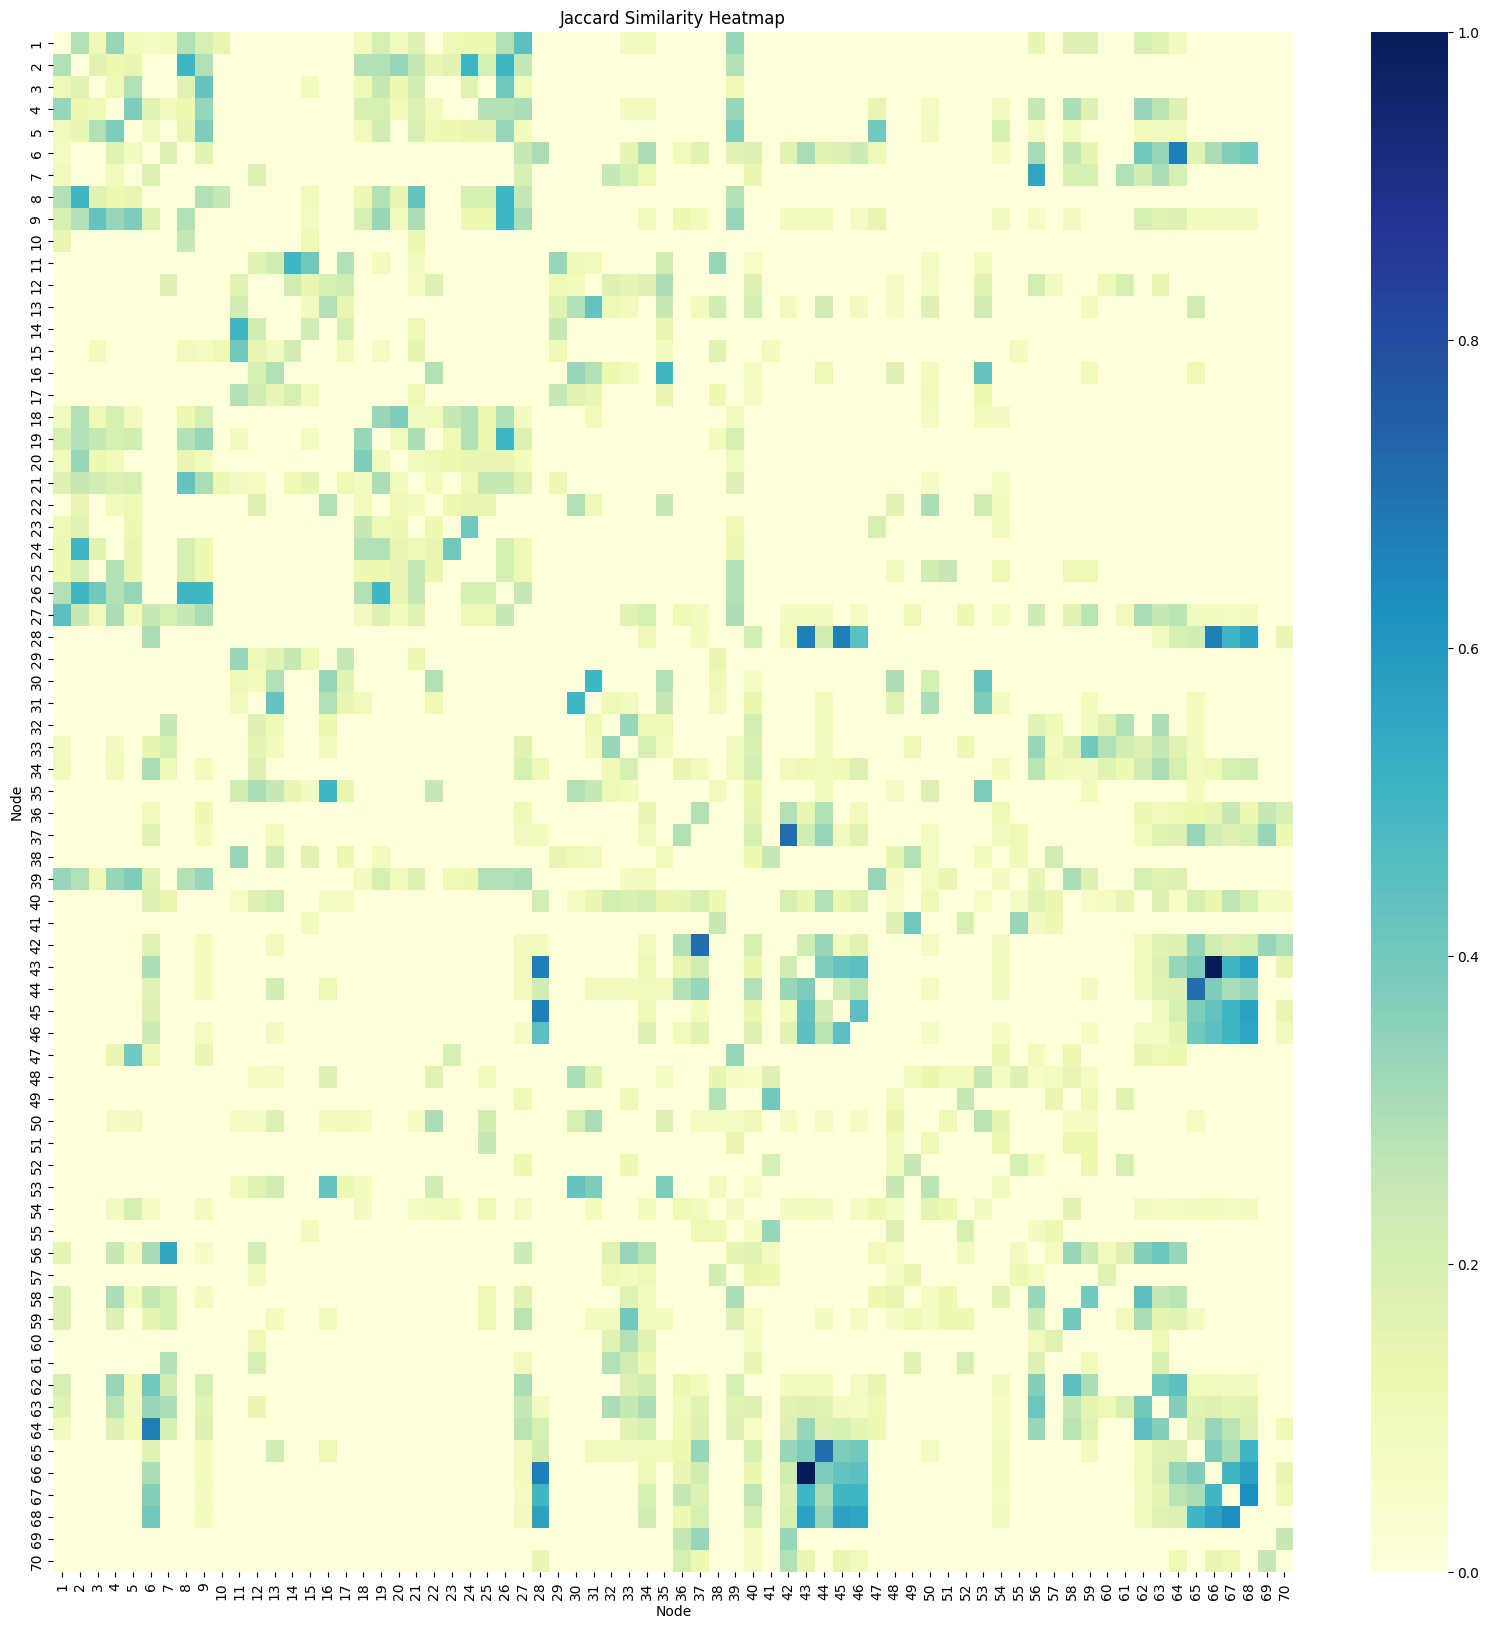

In [106]:
# Initialize a matrix to store Jaccard similarities for all node pairs
num_nodes = len(G.nodes())
jaccard_matrix = np.zeros((num_nodes, num_nodes))

# Iterate through all pairs of nodes in the graph
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2:  # Avoid comparing a node with itself
            # Calculate Jaccard similarity for the neighbors of node1 and node2
            neighbors_node1 = set(G.successors(node1))  # Neighbors of node1
            neighbors_node2 = set(G.successors(node2))  # Neighbors of node2

            intersection = len(neighbors_node1.intersection(neighbors_node2))
            union = len(neighbors_node1.union(neighbors_node2))

            # Calculate Jaccard similarity
            if union == 0:
                jaccard_similarity = 0  # Avoid division by zero if there are no common neighbors
            else:
                jaccard_similarity = intersection / union

            # Store the Jaccard similarity in the matrix
            jaccard_matrix[node1 - 1, node2 - 1] = jaccard_similarity  # Adjust for 0-based indexing

# Find rows and columns with significant Jaccard similarities
significant_rows = np.any(jaccard_matrix > 0.0, axis=1)
significant_columns = np.any(jaccard_matrix > 0.0, axis=0)

# Filter the matrix based on significant rows and columns
filtered_matrix = jaccard_matrix[significant_rows][:, significant_columns]

# Create a heatmap of the filtered Jaccard similarities
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(filtered_matrix, annot=False, cmap="YlGnBu", xticklabels=np.arange(1, num_nodes + 1)[significant_columns], yticklabels=np.arange(1, num_nodes + 1)[significant_rows])
plt.title("Jaccard Similarity Heatmap")
plt.xlabel("Node")
plt.ylabel("Node")

# Create a mappable for the colorbar
mappable = heatmap.get_children()[0]

plt.show()

# Dense subgraphs and Community detection

In [107]:
# K-core decomposition
# Choose a minimum k-core value (k)
k = 3

# Find the k-core subgraph
k_core_subgraph = nx.k_core(G, k)

# Visualize the k-core subgraph (optional)
# You can use network visualization techniques mentioned earlier to visualize the subgraph.

In [108]:
# Maximal clique enumeration
# Find maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G_undirected_1))

# Print the maximal cliques or analyze them further
for clique in maximal_cliques:
    print("Maximal Clique:", clique)

Maximal Clique: [1, 4, 2, 5]
Maximal Clique: [1, 4, 3]
Maximal Clique: [1, 4, 6, 7]
Maximal Clique: [1, 20, 5]
Maximal Clique: [2, 19, 4, 5]
Maximal Clique: [2, 19, 23]
Maximal Clique: [3, 10]
Maximal Clique: [3, 4, 26, 21]
Maximal Clique: [4, 24, 19]
Maximal Clique: [4, 5, 9, 8]
Maximal Clique: [4, 5, 9, 26, 21]
Maximal Clique: [4, 5, 9, 27]
Maximal Clique: [4, 5, 19, 21]
Maximal Clique: [4, 5, 39, 27]
Maximal Clique: [4, 5, 39, 21]
Maximal Clique: [4, 6, 27, 7]
Maximal Clique: [4, 7, 27, 39]
Maximal Clique: [5, 25, 39]
Maximal Clique: [5, 18, 19, 20]
Maximal Clique: [5, 18, 19, 21]
Maximal Clique: [7, 63, 64, 27, 62]
Maximal Clique: [7, 63, 56, 33, 34]
Maximal Clique: [7, 63, 56, 6, 59]
Maximal Clique: [7, 63, 56, 6, 27, 62]
Maximal Clique: [7, 63, 58, 6, 27]
Maximal Clique: [7, 63, 58, 6, 59]
Maximal Clique: [10, 9]
Maximal Clique: [11, 17, 16]
Maximal Clique: [11, 17, 15]
Maximal Clique: [11, 13, 16]
Maximal Clique: [11, 13, 12, 14, 15]
Maximal Clique: [12, 32, 33, 34]
Maximal Cliq

In [109]:
# Louvrain community detection
# Detect communities using the Louvain method
# Print the community assignments for each node
for node, community_id in partition.items():
    print(f"Node {node} belongs to Community {community_id}")

Node 1 belongs to Community 0
Node 8 belongs to Community 0
Node 10 belongs to Community 0
Node 11 belongs to Community 1
Node 17 belongs to Community 1
Node 18 belongs to Community 0
Node 24 belongs to Community 0
Node 23 belongs to Community 0
Node 9 belongs to Community 0
Node 29 belongs to Community 1
Node 12 belongs to Community 1
Node 26 belongs to Community 0
Node 19 belongs to Community 0
Node 2 belongs to Community 0
Node 3 belongs to Community 0
Node 13 belongs to Community 1
Node 20 belongs to Community 0
Node 14 belongs to Community 1
Node 15 belongs to Community 1
Node 21 belongs to Community 0
Node 4 belongs to Community 0
Node 5 belongs to Community 0
Node 40 belongs to Community 2
Node 47 belongs to Community 3
Node 48 belongs to Community 1
Node 38 belongs to Community 1
Node 25 belongs to Community 3
Node 22 belongs to Community 1
Node 49 belongs to Community 1
Node 57 belongs to Community 1
Node 50 belongs to Community 1
Node 30 belongs to Community 1
Node 51 belongs

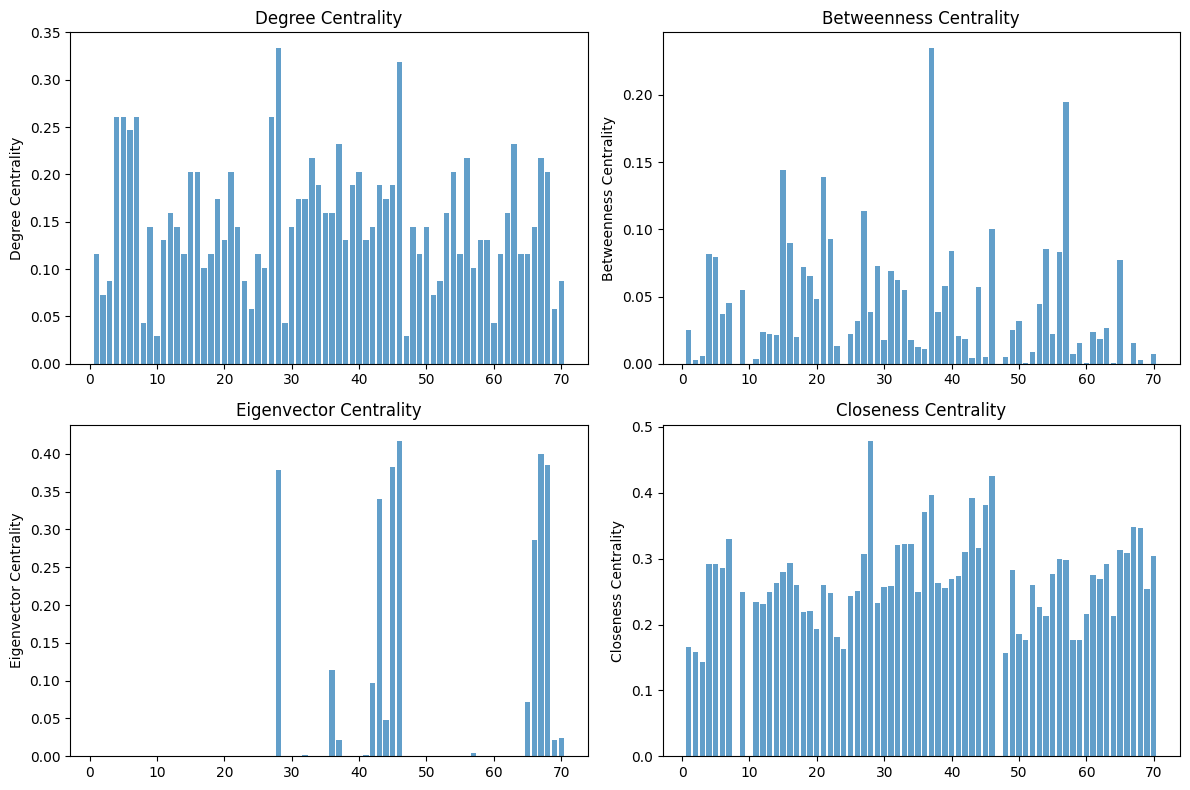

In [110]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ... (Code to create the network and load data)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Create a DataFrame from centrality measures
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Create a 2x2 grid of subplots for the four centrality measures
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2)

# Degree Centrality
ax1 = plt.subplot(gs[0, 0])
ax1.bar(centrality_df['Node'], centrality_df['Degree Centrality'], alpha=0.7)
ax1.set_ylabel('Degree Centrality')
ax1.set_title('Degree Centrality')

# Betweenness Centrality
ax2 = plt.subplot(gs[0, 1])
ax2.bar(centrality_df['Node'], centrality_df['Betweenness Centrality'], alpha=0.7)
ax2.set_ylabel('Betweenness Centrality')
ax2.set_title('Betweenness Centrality')

# Eigenvector Centrality
ax3 = plt.subplot(gs[1, 0])
ax3.bar(centrality_df['Node'], centrality_df['Eigenvector Centrality'], alpha=0.7)
ax3.set_ylabel('Eigenvector Centrality')
ax3.set_title('Eigenvector Centrality')

# Closeness Centrality
ax4 = plt.subplot(gs[1, 1])
ax4.bar(centrality_df['Node'], centrality_df['Closeness Centrality'], alpha=0.7)
ax4.set_ylabel('Closeness Centrality')
ax4.set_title('Closeness Centrality')

# Adjust layout
plt.tight_layout()

# Save the figure as an image
plt.savefig('centrality_bar_plots.png')
plt.show()


In [111]:
# Find nodes with eigenvector centrality less than 0
nodes_with_negative_eigenvector = [node for node, centrality in eigenvector_centrality.items() if centrality < 0.]

# Print the list of nodes with negative eigenvector centrality
print("Nodes with Negative Eigenvector Centrality:")
print(nodes_with_negative_eigenvector)

Nodes with Negative Eigenvector Centrality:
[]
